### Fill in group number and member names:

In [4]:
GROUP = "21"
NAME1 = "Ali Bakly"
NAME2 = "NA"

# Optimization for learning - FRTN50

## Assignment 2

The purpose of this assignment is to empirically explore some convergence and implicit regularization properties of the stochastic gradient decent (SGD) method and some of its variants. These properties are mainly explored by considering simple polynomial fitting problems in $\mathbb{R}$ to facilitate easy comparison with known theoretical results and easy visualization. We will also compare the same fitting problem with multi-layer perceptrons also known as fully connected feedforward neural networks.

Below are the tasks that you need to solve. Keep this in mind:
- Carefully motivate every step in your calculations.
- Use figures and tables to motivate your answers.
- Figures must have appropriately labeled axes and must be referenced in the main text.
- Your code should be written in a quite general manner, i.e., if a question is slightly modified, it should only require slight modifications in your code as well. 
- Comment your code well. 
- Make sure you plot in such a way that small quantities are visible. In particular, use log-linear plots, where the quantity that should go to $0$ is on the $y$-axis using logarithmic scale, and the iteration number $k$ on the $x$-axis using linear scale.
- What you need to submit to Canvas:
    - This jupyter notebook containing your solutions.
    - An exported pdf version of the jupyter notebook.

---
### Exercise 1: Polynomial fitting in $\mathbb{R}$ using least squares with a polynomial feature map

Consider fitting the points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$ to a polynomial model $m(\cdot;\theta):\mathbb{R}\rightarrow\mathbb{R}$ using the method of least squares. Here, the model is given by

$$
\begin{align}
    m(x;\theta) = \theta^{T}\phi(x)
\end{align}
$$

where $\theta\in\mathbb{R}^{n+1}$ is the parameter of the model and $\phi:\mathbb{R}\rightarrow\mathbb{R}^{n+1}$ is a polynomial feature map given by

$$
\begin{align}
    \phi(x) = 
    \begin{bmatrix}
    1 \\
    x \\
    \vdots \\
    x^{n}
    \end{bmatrix}
\end{align}
$$
for each $x\in\mathbb{R}$.

I.e. $m(\cdot;\theta)$ is a polynomial (in particular nonlinear) model of degree $n$ and is linear in the parameter $\theta$. If we compare to deep learning, the model $m(\cdot;\theta)$ would have a specific structure but would be nonlinear in the parameter $\theta$ in general.

The method of least squares involves solving the optimization problem

$$
\begin{equation}\label{eq:1}\tag{1}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& & \frac{1}{N} \sum_{i=1}^{N}(m(x_{i};\theta) - y_{i})^{2} = \frac{1}{N} \sum_{i=1}^{N}\underbrace{(\theta^{T}\phi(x_{i}) - y_{i})^{2}}_{=f_{i}(\theta)} = \frac{1}{N} \sum_{i=1}^{N}f_{i}(\theta) 
\end{aligned}
\end{equation}
$$

giving an optimal point $\theta^{*}\in\mathbb{R}^{n+1}$, and letting $m(\cdot;\theta^{*})$ be the fitted model. If we let 

$$
\begin{align}
    X = 
    \begin{bmatrix}
    \phi(x_{1})^{T} \\
    \vdots \\
    \phi(x_{N})^{T} 
    \end{bmatrix}\in\mathbb{R}^{N \times (n+1)},  \quad \text{ and } \quad
    Y = 
    \begin{bmatrix}
    y_{1} \\
    \vdots \\
    y_{N}
    \end{bmatrix}\in\mathbb{R}^{N},
\end{align}
$$

optimization problem $\eqref{eq:1}$ can be written as 

$$
\begin{equation}\label{eq:2}\tag{2}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& & \frac{1}{N} \left\lVert X\theta - Y \right\rVert_{2}^{2} = f(\theta).
\end{aligned}
\end{equation}
$$

Since the model $m(\cdot;\theta)$ is linear in $\theta$, the function $f$ is convex in $\theta$. This is not the case in deep learning, since the model $m(\cdot;\theta)$ would not be linear in $\theta$ in general.

If the points $x_{i}$ in $\{(x_{i},y_{i})\}_{i=1}^{N}$ are distinct, which is the case in our analysis, it holds that 

$$
\begin{align}
    \text{rank } X = \min(N,n+1).
\end{align}
$$
(See [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) for more info.) In particular,
1. if $N < n+1$, optimization problem $\eqref{eq:2}$ is underdetermined, $X X^{T}$ is invertible and there exist $\theta^{*}\in\mathbb{R}^{n+1}$ such that $X\theta^{*} = Y$,
2. if $N > n+1$, optimization problem $\eqref{eq:2}$ is overdetermined and $X^{T} X$ is invertible,
3. if $N = n+1$, both $X X^{T}$ and $X^{T} X$ are invertible and optimization problem $\eqref{eq:2}$ is neither underdetermined nor overdetermined.

You are allowed to assume these facts as given.

---
__a)__ A model is sometimes said to be overparameterized if it has more parameters than data points. By the same token, a model is said to be underparameterized if it has less parameters than data points. 

- Suppose that our model is overparameterized. Which case of 1., 2. and 3. above does this corresponds to? 
- Suppose that our model is underparameterized. Which case of 1., 2. and 3. above does this corresponds to? 

Motivate your answer. It is crucial that you get this right to avoid confusion later.

__Solution:__ 

- The model in case 1. $(n+1 > N)$ is overparameterized. The model is overparameterized because the number of parameters is larger than the number of data points.
- The model in case 2. $(n+1 < N)$ is underparameterized. The model is underparameterized because the number of parameters is smaller than the number of data points.

---
__b)__ Find $\nabla f$, $\nabla f_{i}$ and $\nabla^{2}f$.

Carefully motivate your answer.

__Solution:__ 

$$
f(\theta) = \frac{1}{N}\|X\theta - Y\|_2^2 = \frac{1}{N}(X\theta - Y)^T(X\theta - Y)
$$

Expanding this expression:

$$
f(\theta) = \frac{1}{N}((X\theta)^T - Y^T)(X\theta - Y)
$$

$$
= \frac{1}{N}((X\theta)^T X \theta - (X\theta)^T Y - Y^T X \theta + Y^T Y)
$$

Recognizing that $(X\theta)^T Y = Y^T X \theta = \theta^T X^T Y$ since it is a scalar:

$$
f(\theta) = \frac{1}{N}(Y^T Y - 2\theta^T X^T Y + \theta^T X^T X \theta)
$$

Now, differentiating $f(\theta)$ with respect to $\theta$:

$$
\nabla f(\theta) = \frac{1}{N}(-2X^T Y + 2X^T X \theta) = \frac{2}{N}X^T(X\theta - Y)
$$

For the Hessian $\nabla^2 f(\theta)$:

$$
\nabla^2 f(\theta) = \frac{2}{N} X^T X
$$

For the individual loss function for each sample $f_i(\theta) = (\theta^T \phi(x_i) - y_i)^2$, by the chain rule, we get:

$$
\nabla f_i(\theta) = 2\phi(x_i)(\phi(x_i)^T \theta - y_i)
$$

---
__c)__ Since $f$ is convex and differentiable, all optimal points $\theta^{*}\in\mathbb{R}^{n+1}$ to the least squares problem are fully characterized by the condition that

$$
\begin{align*}
    \nabla f (\theta^{*}) = 0.
\end{align*}
$$

Suppose that the least squares problem is underparameterized. 

- Show that there exists a solution $\theta^{*}$
- Conclude that it is unique
- Find a expression for $f(\theta^{*})$

Carefully motivate your answer.

__Solution:__ 

$$
\nabla f (\theta^{*}) = 0 \iff 2X^T(X\theta^{*} - Y) = 0 \iff X^T X \theta^{*} - X^T Y = 0 \iff X^T X \theta^{*} = X^T Y \iff \theta ^{*} = (X^T X)^{-1} X^T Y
$$
since $X^T X$ is invertible in the underparameterized case.

Uniqueness follows from the fact that $X$ has full rank as $\text{rank}(X) = \min(N, n+1) = n+1$, which means $X^T X$ is invertible giving us an explicit solution. We can find an expression for $f(\theta^*)$ as follows:

$$
\begin{align*}
f(\theta^*) &= \frac{1}{N}\| X(X^T X)^{-1} X^T Y - Y \|_2^2 
\end{align*}
$$


---
__d)__ Suppose instead that the least squares problem is overparameterized. Let $\theta^{*}\in\mathbb{R}^{n+1}$. Show that $\theta^{*}$ is a solution to the least squares problem if and only if $X\theta^{*} = Y$. I.e. show that:
- If $\theta^{*}$ is a solution to the least squares problem, then $X\theta^{*} = Y$.
- If $X\theta^{*} = Y$, then $\theta^{*}$ is a solution to the least squares problem.

Hence, the solution set is an affine set that can be written as $\Theta^{*}  = \{\theta^{*} \in\mathbb{R}^{n+1}: X\theta^{*}=Y\}$.
- Prove that the set $\Theta^{*}$ is affine.

Carefully motivate your answer.

_Hints:_ Note that $f(\theta)=\frac{1}{N} \left\lVert X\theta - Y \right\rVert_{2}^{2}\geq 0$ for all $\theta\in\mathbb{R}^{n+1}$. Moreover, what can be said in the overparameterized case? What is the definition of an affine set?

__Solution:__ 

Suppose that $\theta^*$ is an optimal solution to the least squares problem. Since $f(\theta) \geq 0$ for all $\theta \in \mathbb{R}^{n+1}$ and $f(\theta^*)$ is minimized, we must have:

$$
f(\theta^*) = 0
$$

This implies that:

$$
\|X\theta^* - Y \|_2^2 = 0 \iff X\theta^* - Y = 0 \iff X\theta^* = Y
$$

Thus, if $\theta^*$ is an optimal solution to the least squares problem, then $X\theta^* = Y$.

Conversely, suppose that $X\theta^* = Y$. The gradient of $f(\theta)$ is given by:

$$
\nabla f(\theta^*) = \frac{2}{N} X^T (X\theta^* - Y)
$$

Substituting $X\theta^* = Y$ into the gradient expression:

$$
\nabla f(\theta^*) = \frac{2}{N} X^T (Y - Y) = 0
$$

Since $\nabla f(\theta^*) = 0$, by part (c), $\theta^*$ is an optimal solution to the least squares problem. Therefore, we have shown that:

- If $\theta^*$ is a solution to the least squares problem, then $X\theta^* = Y$.
- If $X\theta^* = Y$, then $\theta^*$ is a solution to the least squares problem.

Hence, the solution set can be written as:

$$
\Theta^* = \{\theta^* \in \mathbb{R}^{n+1} : X\theta^* = Y\}
$$

__Proving that $\Theta^*$ is an affine set:__

To prove that $\Theta^*$ is an affine set, we need to show that any affine combination of two elements in $\Theta^*$ also belongs to $\Theta^*$. Let $\theta_1, \theta_2 \in \Theta^*$ and $\alpha \in \mathbb{R}$.

Since $\theta_1, \theta_2 \in \Theta^*$, by definition, we have:

$$
X\theta_1 = Y \quad \text{and} \quad X\theta_2 = Y
$$

Now, consider the affine combination of $\theta_1$ and $\theta_2$:

$$
\alpha \theta_1 + (1 - \alpha) \theta_2
$$

Applying the matrix $X$ to this affine combination:

$$
X(\alpha \theta_1 + (1 - \alpha) \theta_2) = \alpha X\theta_1 + (1 - \alpha) X\theta_2
$$

Since $X\theta_1 = Y$ and $X\theta_2 = Y$, we get:

$$
\alpha Y + (1 - \alpha) Y = Y
$$

Thus, the affine combination satisfies $X(\alpha \theta_1 + (1 - \alpha) \theta_2) = Y$, which implies that:

$$
\alpha \theta_1 + (1 - \alpha) \theta_2 \in \Theta^*
$$

Therefore, $\Theta^*$ is an affine set.



---
__e)__ In the overparameterized case, the null space $\mathcal{N}(X)=\{\theta\in\mathbb{R}^{n+1}:X\theta=0\}$ has dimension $\dim\mathcal{N}(X) = n+1-N >0$. This can be shown using, e.g., the rank–nullity theorem. Suppose that $\hat\theta\in\mathbb{R}^{n+1}$ is some point that satisfies $X\hat\theta = Y$ and that $v\in\mathcal{N}(X)$. 

- Show that $\hat\theta+v$ is a solution to the least squares problem.
- Show that $\hat\theta+\alpha v$ is a solution to the least squares problem for all $\alpha \in \mathbb{R}$. (This follows from from the above but is included to emphasize the fact that, assuming $v\neq 0$, we can add an arbitrary large vector to $\hat\theta$ and it still remains a solution to the the least squares problem.)

As a consequence, note that an another characterization of the set of solutions of the least squares problem is given by $\Theta^{*}  = \{\hat\theta + v : v\in\mathcal{N}(X) \}$. In particular, $\Theta^{*}$ has dimension $\dim\Theta^{*} = n+1-N >0$. Therefore, the more overparameterized (larger $n+1-N$) the problem is, the large the solution set $\Theta^{*}$ becomes. 

- Show that $\Theta^{*}$ and $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are equal. One way to show this is to show that all elements of $\Theta^{*}$ are in $\{\hat\theta + v : v\in\mathcal{N}(X) \}$, i.e. $\Theta^{*}\subseteq\{\hat\theta + v : v\in\mathcal{N}(X) \}$, and that all elements in $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are in $\Theta^{*}$, i.e. $\{\hat\theta + v : v\in\mathcal{N}(X) \}\subseteq\Theta^{*}$.

Carefully motivate your answer.


__Solution:__

We are given that $X\hat{\theta} = Y$ and $v \in \mathcal{N}(X)$. We need to show the following:

__1. Show that $\hat{\theta} + v$ is a solution to the least squares problem:__

We start by calculating $X(\hat{\theta} + v)$:

$$
X(\hat{\theta} + v) = X\hat{\theta} + Xv
$$

Since $v \in \mathcal{N}(X)$, we know that $Xv = 0$, so:

$$
X(\hat{\theta} + v) = X\hat{\theta} + 0 = Y
$$

Thus, $\hat{\theta} + v$ is a solution to the least squares problem.

__2. Show that $\hat{\theta} + \alpha v$ is a solution to the least squares problem for all $\alpha \in \mathbb{R}$:__

Now consider $X(\hat{\theta} + \alpha v)$, where $\alpha \in \mathbb{R}$:

$$
X(\hat{\theta} + \alpha v) = X\hat{\theta} + X(\alpha v) = X\hat{\theta} + \alpha Xv
$$

Again, since $Xv = 0$ (because $v \in \mathcal{N}(X)$), we have:

$$
X(\hat{\theta} + \alpha v) = X\hat{\theta} + \alpha \cdot 0 = Y
$$

Thus, $\hat{\theta} + \alpha v$ is a solution to the least squares problem for all $\alpha \in \mathbb{R}$.

__3. Show that $\Theta^* \subseteq \{\hat{\theta} + v : v \in \mathcal{N}(X)\}$:__

Let $\theta^* \in \Theta^*$. This means $X\theta^* = Y$. We also know that $X\hat{\theta} = Y$. Then:

$$
X\theta^* - X\hat{\theta} = X(\theta^* - \hat{\theta}) = 0
$$

This implies that $\theta^* - \hat{\theta} \in \mathcal{N}(X)$. Thus, we can write $\theta^* - \hat{\theta} = v$ for some $v \in \mathcal{N}(X)$, which gives:

$$
\theta^* = \hat{\theta} + v
$$

Therefore, $\theta^* \in \{\hat{\theta} + v : v \in \mathcal{N}(X)\}$, so we conclude that:

$$
\Theta^* \subseteq \{\hat{\theta} + v : v \in \mathcal{N}(X)\}
$$

__4. Show that $\{\hat{\theta} + v : v \in \mathcal{N}(X)\} \subseteq \Theta^*$:__

Let $\hat{\theta} + v$ be any element where $v \in \mathcal{N}(X)$. We calculate:

$$
X(\hat{\theta} + v) = X\hat{\theta} + Xv = Y + 0 = Y
$$

Thus, $\hat{\theta} + v$ is a solution to $X\theta^* = Y$, which means that $\hat{\theta} + v \in \Theta^*$. Therefore:

$$
\{\hat{\theta} + v : v \in \mathcal{N}(X)\} \subseteq \Theta^*
$$


---
__f)__ Suppose that the least squares problem is overparameterized. 

Why can we not use the solution from __c)__ in this case?

__Solution:__ 

We cannot use the solution from __c)__ in this case because  $X^{T}X \in \mathbb{R}^{(n+1)\times(n+1)}$ does not have full rank:

$$\text{ rank }(X^{T}X)=\text{ rank }(X)=\text{N}<(n+1).$$


Due to this, $X^{T}X$ is not invertible and therefore the solution form __c)__ cannot be used.

---
__g)__ Suppose that the least squares problem is overparameterized. 

We know from __d)__ and __e)__ that the set of all solutions $\Theta^{*}$ is an affine set with infinitely many elements. One way to pick a solution is to start with some candidate point $a\in\mathbb{R}^{n+1}$ and project it onto $\Theta^{*}$. Since $\Theta^{*}$ is closed, convex and nonempty, the projection point exists and is unique, and can be found by solving the optimization problem 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{2}^{2}\\
& \text{subject to}
& &  \theta \in \Theta^{*}.
\end{aligned}
\end{equation} 
$$ 

We call this the Euclidean projection problem. Another way to write the Euclidean projection problem is 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{2}^{2} + \iota_{\Theta^{*}}(\theta)
\end{aligned}
\end{equation} 
$$ 


where $\iota_{\Theta^{*}}$ is the indicator function of the set $\Theta^{*}$. By Fermat's rule, $\theta^{*} \in\mathbb{R}^{n+1}$ is an optimal point to the Euclidean projection problem if and only if the optimality condition

$$
\begin{align*}
0 \in \theta^{*} - a + \partial \iota_{\Theta^{*}}(\theta^{*})
\end{align*}
$$

holds, by convexity and since CQ holds. Note that in the exercise compendium, we show that the subdifferential of the indicator function of a set is the normal cone to that set. In particular, in our case we have that 

$$
\begin{align*}
\partial \iota_{\Theta^{*}}(\theta^{*}) &= N_{\Theta^{*}}(\theta^{*}) \\
&= 
\begin{cases}
\left\{s\in\mathbb{R}^{n}: \forall \eta\in \Theta^{*},\, s^{T}(\eta-\theta^{*})\leq 0\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&= 
\begin{cases}
\left\{s\in\mathbb{R}^{n}: \forall v\in \mathcal{N}(X),\, s^{T} v = 0\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&=
\begin{cases}
\mathcal{R}(X^{T})   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&=
\begin{cases}
\left\{X^{T}\lambda: \lambda \in \mathbb{R}^{N}\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}.
\end{cases} 
\end{align*}
$$

If we combine this with the optimality condition above we get that $\theta^{*}$ is an optimal point to the Euclidean projection problem if and only if there exists a $\lambda^{*}\in\mathbb{R}^{N}$ such that 

$$
\begin{align}
    0 = \theta^{*} - a + X^{T}\lambda^{*} \quad \text{ and } \quad X\theta^{*}=Y.
\end{align}
$$ 

Use this last optimality condition to show that $\theta^{*} = a - X^{T}(XX^{T})^{-1}(Xa-Y)$ is the optimal point for the Euclidean projection problem. We also call this $\theta^{*}$ the Euclidean projection (of $a$ onto $\Theta^{*}$).

Carefully motivate your answer.

_Remark:_ We have a generalization: Suppose that $H\in\mathbb{S}^{n+1}_{++}$ and let $\left\lVert \theta \right\rVert_{H}^{2} = \theta^{T}H\theta$. Then the scaled projection problem 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{H}^{2}\\
& \text{subject to}
& &  \theta \in \Theta^{*}.
\end{aligned}
\end{equation} 
$$ 

has the solution $\theta^{*} = a - H^{-1}X^{T}(X H^{-1}X^{T})^{-1}(X a-Y)$. We call this $\theta^{*}$ the scaled projection (of $a$ onto $\Theta^{*}$). You are not allowed to used this generalization to solve this problem. However, it will be used later.

__Solution:__

We are given an overparameterized least squares problem and need to find the optimal point $\theta^*$ by solving the Euclidean projection problem. 

From the optimality condition, we know that $\theta^*$ is optimal if and only if:

$$
0 = \theta^* - a + X^T \lambda^* \iff \theta^* = a - X^T \lambda^*
$$

Multiplying both sides of this by $X$, we get:

$$
X\theta^* = X(a - X^T \lambda^*) \iff X\theta^* = Xa - XX^T \lambda^*
$$

Since $X\theta^* = Y$, we can substitute this into the equation:

$$
Xa - XX^T \lambda^* = Y \iff XX^T \lambda^* = Xa - Y
$$

Since $XX^T$ is invertible in the overparameterized case, we solve for $\lambda^*$:

$$
\lambda^* = (XX^T)^{-1}(Xa - Y)
$$

Substituting this expression for $\lambda^*$ back into the equation for $\theta^*$:

$$
\theta^* = a - X^T (XX^T)^{-1} (Xa - Y)
$$

Thus, the optimal point $\theta^*$ for the Euclidean projection problem is:

$$
\theta^* = a - X^T (XX^T)^{-1} (Xa - Y),
$$

as desired result.

---
__h)__ Show that $f:\mathbb{R}^{n+1}\rightarrow\mathbb{R}$ is $\beta$-smooth, i.e., $\nabla f$ is $\beta$-Lipschitz continuous, with constant

$$
\begin{align}
    \beta = \frac{2}{N}\left\lVert X^{T}X \right\rVert_{2}.
\end{align}
$$

Recall that $\nabla f$ is said to be $\beta$-Lipschitz continuous if

$$
\begin{align}
    \left\lVert \nabla f(\theta_{1}) - \nabla f(\theta_{2}) \right\rVert_{2} \leq \beta\left\lVert \theta_{1} - \theta_{2} \right\rVert_{2}, \quad \forall \theta_{1},\theta_{2} \in \mathbb{R}^{n+1}.
\end{align}
$$

_Hint:_ Recall that the spectral norm of a matrix $A\in\mathbb{R}^{l\times m}$ is defined as 

$$
\begin{align}
    \left\lVert A \right\rVert_{2} = \sup_{z\in\mathbb{R}^{m}\setminus\{0\}}\frac{\left\lVert A z \right\rVert_{2}}{\left\lVert z \right\rVert_{2}}.
\end{align}
$$

In particular,

$$
\begin{align}
    \left\lVert A z \right\rVert_{2} \leq \left\lVert A \right\rVert_{2} \left\lVert z \right\rVert_{2}, \quad \forall z \in\mathbb{R}^{m}.
\end{align}
$$

_Remark:_ Note that $\left\lVert \cdot \right\rVert_{2}$ is the __spectral norm__ and not the __Frobenius norm__ - this difference is very important to consider in your implementation below where you will use this $\beta$. Moreover, note that $\beta$ depends on $X$, and will vary as $X$ varies.


__Solution:__ 

The gradient of the function $f(\theta)$ is given by:

$$
\nabla f(\theta) = \frac{2}{N} X^T (X \theta - Y).
$$

Now, let's calculate the difference between $\nabla f(\theta_1)$ and $\nabla f(\theta_2)$:

$$
\begin{align*}
\left\lVert \nabla f(\theta_1) - \nabla f(\theta_2) \right\rVert_2 &= \left\lVert \frac{2}{N} X^T (X \theta_1 - Y) - \frac{2}{N} X^T (X \theta_2 - Y) \right\rVert_2 \\
&= \frac{2}{N} \left\lVert X^T (X \theta_1 - Y - (X \theta_2 - Y)) \right\rVert_2 \\
&= \frac{2}{N} \left\lVert X^T X (\theta_1 - \theta_2) \right\rVert_2.
\end{align*}
$$

Using the fact that for any matrix $A$ and vector $z$, we have $\left\lVert A z \right\rVert_2 \leq \left\lVert A \right\rVert_2 \left\lVert z \right\rVert_2$, we can write:

$$
\frac{2}{N} \left\lVert X^T X (\theta_1 - \theta_2) \right\rVert_2 \leq \frac{2}{N} \left\lVert X^T X \right\rVert_2 \left\lVert \theta_1 - \theta_2 \right\rVert_2.
$$

Thus, we conclude that $\nabla f$ is $\beta$-Lipschitz continuous with constant:

$$
\beta = \frac{2}{N} \left\lVert X^T X \right\rVert_2.
$$


---
### Exercise 2: Implementing GD and SGD for polynomial fitting 
_Remark:_ You should solve this exercise using `numpy` primarily.

Consider the data point $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:

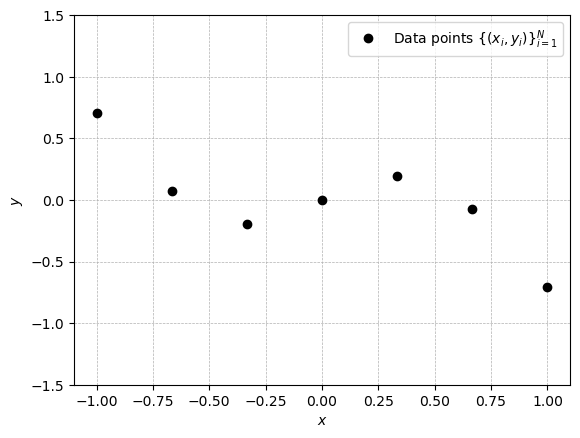

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

In [6]:
xs

array([-1.        , -0.66666667, -0.33333333,  0.        ,  0.33333333,
        0.66666667,  1.        ])

We wish to fit a polynomial model $m(\cdot;\theta)$ of degree $n=3$ (overdetermined) and $n=9$ (underdetermined) to the data points  $\{(x_{i},y_{i})\}_{i=1}^{N}$ by solving optimization problem (1) or equivalently (2) in __Exercise 1__ above.

---
__a)__ First, do this by implementing the GD method. The GD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$
- For $k\geq 0$:
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} \nabla f(\theta_{k})$ for some $\gamma_{k}>0$.

Pick $\theta_{0} = 0$ as the initial point, and try the constant step size

1. $\gamma_{k} = 1 / \beta$,

and run for $10^5$ iterations. Here, $\beta$ is the smoothness parameter from __Exercise 1__ above. Plot, in log-linear scale, both

- $f(\theta_{k})-f(\theta^{*})$ and
- $f(\overline{\theta}_{k})-f(\theta^{*})$ where $\overline{\theta}_{k} = \frac{1}{k+1}\sum_{l=0}^{k}\theta_{l}$, (Hint: use [sequential average computation](https://math.stackexchange.com/questions/106313/regular-average-calculated-accumulatively))

as a function of iteration number $k$. Give comments:
- Describe any difference between the $n=3$ (overdetermined) and $n=9$ (underdetermined) cases.

_Hint:_ What is $f(\theta^{*})$ in the overdetermined and underdetermined case, respectively? 

__Solution:__ 

For the underdetermined case, where $f(\theta^*) = 0$, the convergence of $f(\theta_k) - f(\theta^*)$ is slower compared to the overdetermined case. This is because, while the system can achieve an exact solution, it takes more iterations for the function value to reach zero. Similarly, $f(\bar{\theta_k}) - f(\theta^*)$ also converges more slowly but eventually reaches zero.

In the overdetermined case, where $f(\theta^*)$ is close to zero but not exactly zero, the convergence of $f(\theta_k) - f(\theta^*)$ is faster. It quickly approaches a small positive value because the system cannot reach an exact solution. The orange curve, $f(\bar{\theta_k}) - f(\theta^*)$, converges more slowly but stabilizes at a small positive value as well.

In [62]:
def compute_f(theta, X, Y, N):
    """
    Compute the objective function f(theta) = (1/N) * ||X @ theta - Y||^2.

    Parameters:
    theta (numpy array): Parameter vector.
    X (numpy array): Design matrix of features.
    Y (numpy array): Target vector.
    N (int): Number of data points (size of Y).

    Returns:
    float: The computed objective function value.
    """
    return (1/N) * np.linalg.norm(X @ theta - Y, 2)**2

def grad_f(theta, X, Y, N):
    """
    Compute the gradient of the objective function f(theta).

    Parameters:
    theta (numpy array): Parameter vector.
    X (numpy array): Design matrix of features.
    Y (numpy array): Target vector.
    N (int): Number of data points (size of Y).

    Returns:
    numpy array: The gradient of the objective function with respect to theta.
    """
    return (2/N) * X.T @ (X @ theta - Y)

def beta(X, N):
    """
    Compute the Lipschitz constant (beta) for the gradient of f(theta).

    Parameters:
    X (numpy array): Design matrix of features.
    N (int): Number of data points (size of Y).

    Returns:
    float: The computed Lipschitz constant.
    """
    return (2/N) * np.linalg.norm(X.T @ X)

def theta_star(X, Y):
    """
    Compute the optimal solution (theta*) to the least squares problem.

    Parameters:
    X (numpy array): Design matrix of features.
    Y (numpy array): Target vector.

    Returns:
    numpy array: The optimal parameter vector theta*.
    """
    return np.linalg.inv(X.T @ X) @ X.T @ Y

def create_X(data, degree):
    """
    Create the design matrix X for polynomial regression up to a given degree.

    Parameters:
    data (numpy array): Input data (independent variable).
    degree (int): The degree of the polynomial.

    Returns:
    numpy array: The design matrix X with polynomial features.
    """
    X = np.ones((data.shape[0], 1))  # Start with the intercept term (bias)
    for d in range(1, degree + 1):
        # Add polynomial features of degree d to X
        X = np.concatenate((X, np.power(data, d).reshape(-1, 1)), axis=1)   
    return X

def gradient_descent(theta, X, Y, N, max_iter, theta_star=None, return_all_thetas = False):
    """
    Perform gradient descent to minimize the least squares objective function.

    Parameters:
    theta (numpy array): Initial parameter vector.
    X (numpy array): Design matrix of features.
    Y (numpy array): Target vector.
    N (int): Number of data points.
    max_iter (int): Maximum number of iterations.
    theta_star (numpy array, optional): The optimal parameter vector, if known.

    Returns:
    tuple: The final parameter vector (theta), the suboptimality values, 
           and the average suboptimality values.
    """
    theta_avg = theta.copy()
    
    if return_all_thetas:
        all_thetas = [theta]
    
    gamma = 1 / beta(X, N)  # Step size for gradient descent
    f_star = 0 if theta_star is None else compute_f(theta_star, X, Y, N)

    # Lists to store suboptimality values at each iteration
    suboptimality = [compute_f(theta, X, Y, N) - f_star]
    avg_suboptimality = [suboptimality[0]]

    # Gradient descent loop
    for i in range(1, max_iter + 1):
        # Update theta using the gradient
        theta = theta - gamma * grad_f(theta, X, Y, N)
        if return_all_thetas:
            all_thetas.append(theta)
        # Update the average of the iterates
        theta_avg = (i * theta_avg + theta) / (i + 1)

        # Compute and store suboptimality values
        suboptimality.append(compute_f(theta, X, Y, N) - f_star)
        avg_suboptimality.append(compute_f(theta_avg, X, Y, N) - f_star)

    if return_all_thetas:
        return theta, suboptimality, avg_suboptimality, all_thetas
    
    return theta, suboptimality, avg_suboptimality

def plot_suboptimality(suboptimality, avg_suboptimality, custom):
    """
    Plot the suboptimality and average suboptimality vs iterations.

    Parameters:
    suboptimality (list): List of suboptimality values f(theta_k) - f(theta*).
    avg_suboptimality (list): List of average suboptimality values f(theta_avg_k) - f(theta*).
    custom (str): Custom text to add to the plot title.
    """
    # Create an array of iteration numbers
    iterations = np.arange(len(suboptimality))

    # Create the plot with a logarithmic y-axis
    plt.figure(dpi=100)

    # Plot suboptimality for theta_k
    plt.semilogy(iterations, suboptimality, label=r'$f(\theta_k) - f(\theta^*)$')

    # Plot average suboptimality for theta_avg_k
    plt.semilogy(iterations, avg_suboptimality, label=r'$f(\overline{\theta}_k) - f(\theta^*)$')

    # Add labels and title
    plt.xlabel('Iteration $k$')
    plt.ylabel('Suboptimality')
    plt.title('Suboptimality vs Iterations (Log-linear Scale)' + custom)
    
    # Add legend
    plt.legend()

    # Add grid for better visualization
    plt.grid(linestyle='dashed', linewidth=0.5)

    # Show the plot
    plt.show()


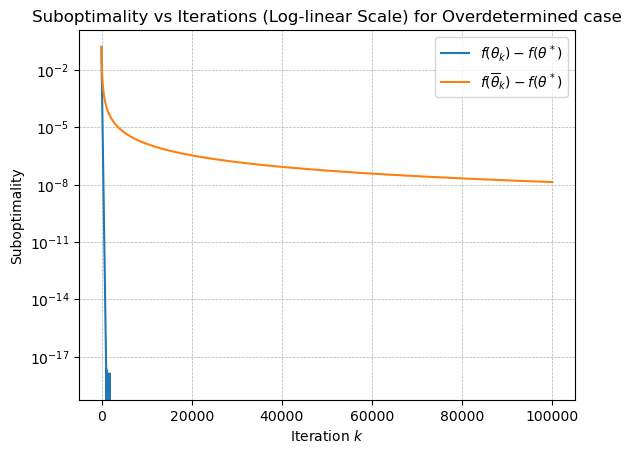

In [63]:
X = create_X(xs, 3)
theta_opt = theta_star(X, ys)
theta, suboptimality, avg_suboptimality = gradient_descent(np.zeros(4), X, ys, N, 10**5, theta_opt)
plot_suboptimality(suboptimality, avg_suboptimality, ' for Overdetermined case')

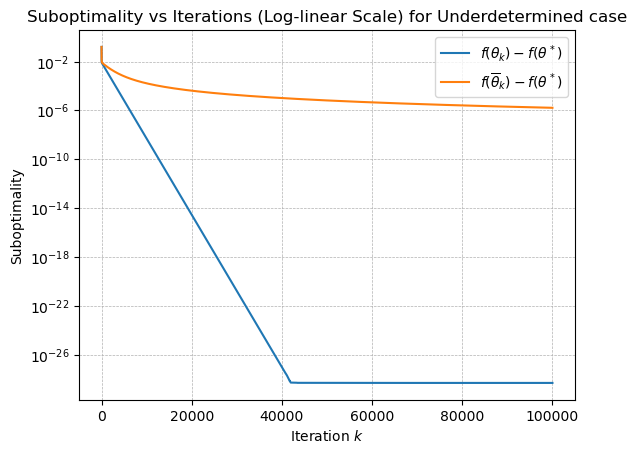

In [64]:
X = create_X(xs, 9)
theta, suboptimality, avg_suboptimality = gradient_descent(np.zeros(10), X, ys, N, 10**5)
plot_suboptimality(suboptimality, avg_suboptimality, ' for Underdetermined case')

---
__b)__ Next, do this by implementing the SGD method. The SGD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$
- For $k\geq 0$:
    - Pick $i\in\{1,\ldots,N\}$ uniformly at random
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} \nabla f_{i}(\theta_{k})$ for some $\gamma_{k}>0$.

Pick $\theta_{0} = 0$ and try the step sizes

1. $\gamma_{k} = \frac{0.1}{\beta}$,
2. $\gamma_{k} = \frac{0.1}{\beta(k+1)}$,
3. $\gamma_{k} = \frac{0.1}{\beta(\lfloor k/1000\rfloor+1)}$, where $\lfloor \cdot \rfloor$ is the floor function,

and run for $10^5 N$ iterations. Plot, in log-linear scale, both

- $f(\theta_{k})-f(\theta^{*})$ and
- $f(\overline{\theta}_{k})-f(\theta^{*})$ where $\overline{\theta}_{k} = \frac{1}{k+1}\sum_{l=0}^{k}\theta_{l}$,

as a function of iteration number $k$. Give comments:
- Does the step sizes matter? 
- Is there a difference between the $n=3$ (overdetermined) and $n=9$ (underdetermined) cases. 
- Which combination worked best? 
- Which combination of $\gamma_{k}$ and $n$ (i.e. overdetermined or underdetermined) corresponds the most to training of neural networks? This question qualitative and has no unique answer.

__Solution:__ 

1. Yes it does matter! This ic clearly seen in the plots.
2. Yes, it seems that for the underdetermined case we do not get convergence using $\gamma_3$, where as we do for the overdetermined case. The other stepsizes yield similar results.
3. Underdetermined case (n=9) with $\gamma_1$ seems to do the best.
4. For neural networks we usually have a lot of paramers and less data so we have the underdermined case, and in that case you would probably have a decreasing step size with number of iterations meaning $\gamma_2$ or $\gamma_3$.

In [65]:
import numpy as np

def grad_f_i(theta, X, Y, i):
    """
    Compute the gradient of the i-th data point for the least squares objective.

    Parameters:
    theta (numpy array): Parameter vector.
    X (numpy array): Design matrix of features.
    Y (numpy array): Target vector.
    i (int): Index of the data point to compute the gradient for.

    Returns:
    numpy array: Gradient of the i-th data point with respect to theta.
    """
    return 2 * X[i, :].T * (X[i, :] @ theta - Y[i])

def gamma_1(k, beta_val):
    """
    Compute the step size for iteration k using a constant learning rate strategy.

    Parameters:
    k (int): Current iteration number.
    beta_val (float): Lipschitz constant for gradient.

    Returns:
    float: Step size for iteration k.
    """
    return 0.1 / beta_val

def gamma_2(k, beta_val):
    """
    Compute the step size for iteration k using a decaying learning rate strategy (1/(k+1)).

    Parameters:
    k (int): Current iteration number.
    beta_val (float): Lipschitz constant for gradient.

    Returns:
    float: Step size for iteration k.
    """
    return 0.1 / (beta_val * (k + 1))

def gamma_3(k, beta_val):
    """
    Compute the step size for iteration k using a floor-based decaying learning rate strategy.

    Parameters:
    k (int): Current iteration number.
    beta_val (float): Lipschitz constant for gradient.

    Returns:
    float: Step size for iteration k.
    """
    return 0.1 / (beta_val * (np.floor(0.001 * k) + 1))

def stoch_gradient_descent(theta, X, Y, N, max_iter, gamma, theta_star=None, return_all_thetas = False):
    """
    Perform stochastic gradient descent to minimize the least squares objective function.

    Parameters:
    theta (numpy array): Initial parameter vector.
    X (numpy array): Design matrix of features.
    Y (numpy array): Target vector.
    N (int): Number of data points.
    max_iter (int): Maximum number of iterations.
    gamma (function): Step size function to use during the iterations.
    theta_star (numpy array, optional): The optimal parameter vector, if known.

    Returns:
    tuple: Final parameter vector (theta), suboptimality values, 
           and average suboptimality values over iterations.
    """
    theta_avg = theta.copy()  # Initialize average theta
    if return_all_thetas:
        all_thetas = [theta]
    beta_val = beta(X, N)  # Compute Lipschitz constant for gradient
    f_star = 0 if theta_star is None else compute_f(theta_star, X, Y, N)  # Optimal function value

    # Lists to store suboptimality values at each iteration
    suboptimality = [compute_f(theta, X, Y, N) - f_star]
    avg_suboptimality = [suboptimality[0]]

    # Stochastic Gradient Descent loop
    for k in range(max_iter):
        # Randomly select a data point i
        i = np.random.randint(0, N)
        
        # Update theta using the gradient of the i-th data point
        theta = theta - gamma(k, beta_val) * grad_f_i(theta, X, Y, i)
        if return_all_thetas:
            all_thetas.append(theta)
        # Update the average of the iterates
        theta_avg = (k * theta_avg + theta) / (k + 1)

        # Compute and store suboptimality values
        suboptimality.append(compute_f(theta, X, Y, N) - f_star)
        avg_suboptimality.append(compute_f(theta_avg, X, Y, N) - f_star)
    if return_all_thetas:
        return theta, suboptimality, avg_suboptimality, all_thetas
    
    return theta, suboptimality, avg_suboptimality


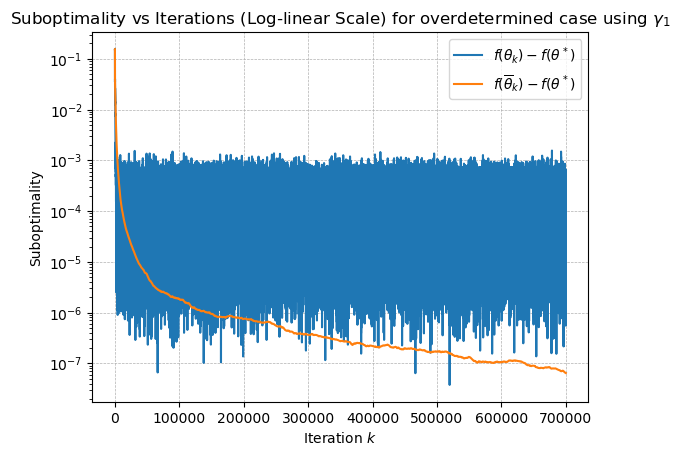

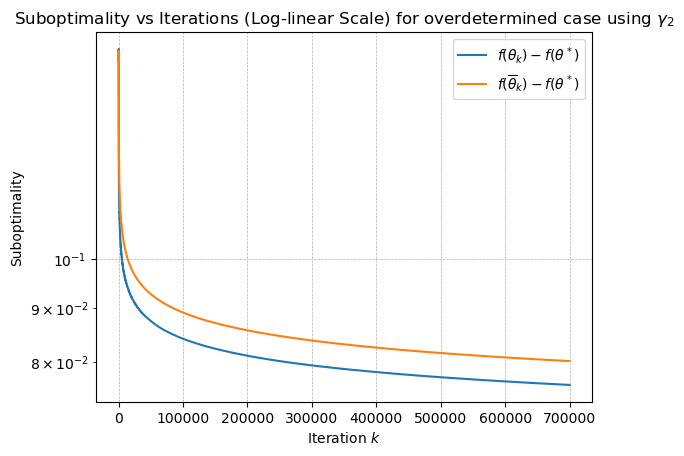

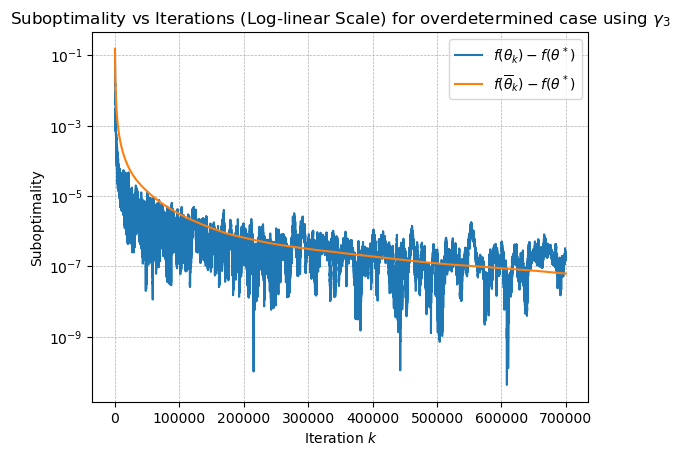

In [11]:
X = create_X(xs, 3)
theta_opt = theta_star(X, ys)
for gamma, s in zip([gamma_1, gamma_2, gamma_3], ['$\gamma_1$', '$\gamma_2$', '$\gamma_3$']):
    theta, suboptimality, avg_suboptimality = stoch_gradient_descent(np.zeros(4), X, ys, N, N*10**5, gamma, theta_opt)
    plot_suboptimality(suboptimality, avg_suboptimality, ' for overdetermined case using ' + s)

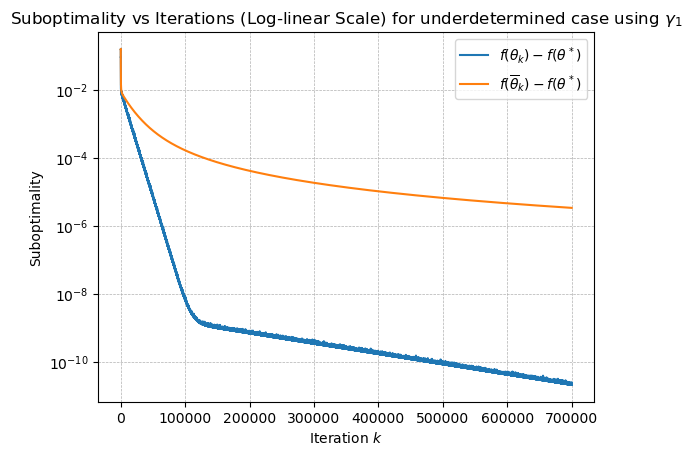

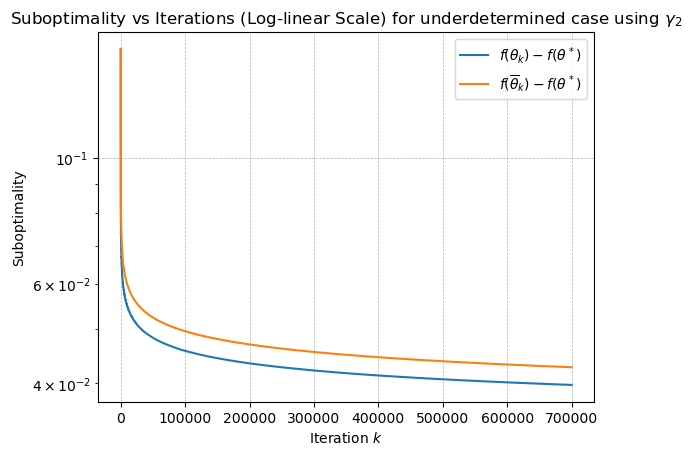

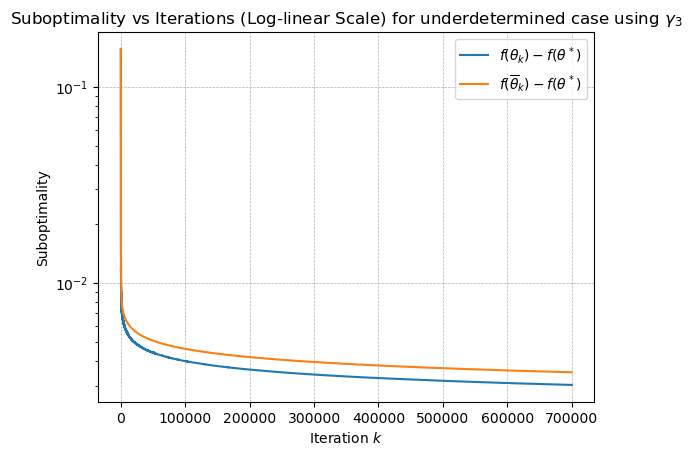

In [12]:
X = create_X(xs, 9)
for gamma, s in zip([gamma_1, gamma_2, gamma_3], ['$\gamma_1$', '$\gamma_2$', '$\gamma_3$']):
    theta, suboptimality, avg_suboptimality = stoch_gradient_descent(np.zeros(10), X, ys, N, N*10**5, gamma)
    plot_suboptimality(suboptimality, avg_suboptimality, ' for underdetermined case using ' + s)

---
### Exercise 3: Fitting points in $\mathbb{R}$ using fully connected feedforward neural networks

Again, we consider the data points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:


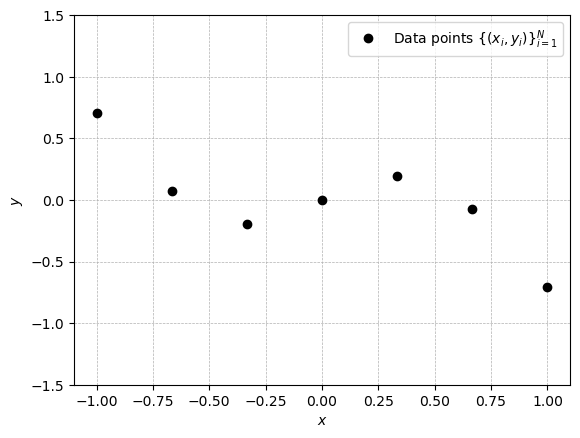

In [13]:
N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

Polynomial fitting as in __Exercise 1__ and __Exercise 2__ gives:

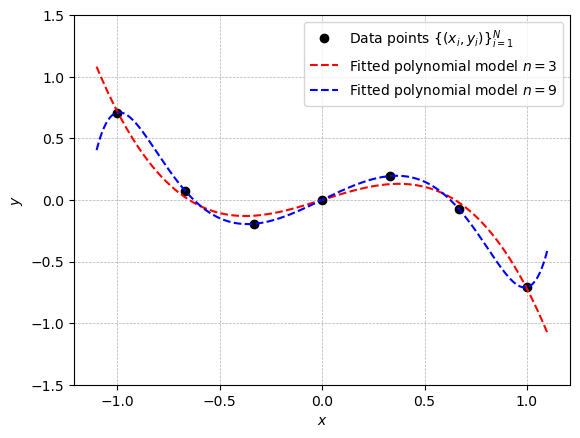

In [14]:
theta_star_n_9 = np.array([0,  0.8, 0, -1.9, 0, -0.583957507, 0, 0.28, 0, 0.695322536])
theta_star_n_3 = np.array([0,  0.523557283,  0, -1.24520755])
x = np.linspace(-1.1, 1.1, num = 1000)

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_star_n_3), x),'r--')
axes.plot(x, np.polyval(np.flip(theta_star_n_9), x),'b--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Fitted polynomial model $n=3$', r'Fitted polynomial model $n=9$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

In this exercise, we are going to explore fitting of these data points using fully connected feedforward neural networks. We will do this by considering the problem

$$
\begin{align}\label{eq:3}\tag{3}
		\underset{\theta}{\mathrm{minimize}} \frac{1}{N}\sum_{i=1}^N L(m(x_i;\theta),y_i)
\end{align}
$$

where $L:\mathbb{R}\times\mathbb{R}\rightarrow\mathbb{R}$ is the least squares loss, i.e.

$$
\begin{align*}
L(u,y) = (u-y)^{2}
\end{align*}
$$

for each $u,y\in\mathbb{R}$ and $m(\cdot;\theta):\mathbb{R}\rightarrow\mathbb{R}$ is a fully connected feedforward neural network model, i.e.

$$
\begin{align*}
m(x;\theta) = W_{D}\sigma_{D-1}(W_{D-1}\sigma_{D-2}(...\sigma_1(W_1 x + b_{1})...)+b_{D-1})+b_{D}	
\end{align*}
$$

for each $x\in\mathbb{R}$, where $\sigma_i$ is an activation functions that act elements-wise, for each $i=1,\ldots,D-1$, and

$$
\begin{align*}
    \theta = (W_{1},b_1,\ldots,W_{D},b_{D})
\end{align*}
$$

such that

$$
\begin{align*}
    \begin{cases}
        W_{1}\in\mathbb{R}^{f_{1} \times 1}& \text{ and }\quad b_{1} \in\mathbb{R}^{f_1}\\	
        W_{i}\in\mathbb{R}^{f_{i} \times f_{i-1}}& \text{ and }\quad b_{i} \in\mathbb{R}^{f_i} \quad\text{ for }\quad i=2,\ldots,D-1 \\
        W_{D}\in\mathbb{R}^{1 \times f_{D-1}}& \text{ and }\quad b_{D} \in\mathbb{R}.
    \end{cases}
\end{align*}
$$

In particular, we will study how the trained model $m(\cdot;\theta)$ depends on:
- The widths ($f_{i}$) and depth ($D$)
- Different activation functions ($\sigma_{i}$)
- Different initial points $\theta_{0}$ used in training
- Different training algorithms such as SGD and and Adam

We will also study:
- How the loss landscape of (3) looks along different directions at an "optimal point" of (3). (Note that we in general have no guarantees that our optimization algorithms will reach a true optimal point of (3) since the problem in nonconvex in general.)

_Remark:_
We will train the models using `pytorch`. `pytorch` is a widely used library or *module* for doing machine learning in python.
It allows the user to construct, train and evaluate neural networks.

- You will need to [install](https://anaconda.org/pytorch/pytorch) `pytorch`

Take a quick look at `pytorch`'s
- [tutorials](https://pytorch.org/tutorials/)
- [documentation](https://pytorch.org/docs/stable/index.html)

---
`pytorch` expects to get data from a `DataLoader` object. Below we create a `DataLoader` and provide it with our data:

In [15]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import optim

torch_xs = torch.tensor(xs.reshape((N,1)), dtype=torch.float32)
torch_ys = torch.tensor(ys.reshape((N,1)), dtype=torch.float32)
dataset = TensorDataset(torch_xs, torch_ys)
data_loader = DataLoader(dataset, batch_size=len(xs)) # other batch sizes are of course allowed

Typically in `pytorch`, models are defined as a child of the `nn.Module` class. Below, we create a model with:
- Depth $D=2$
- Width $f_1=10$
- ReLU as activation function 

In [16]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x

# Create an instance of the model class.
model = model()

In machine learning, the objective function in (3) is sometimes itself called a loss function. In fact, it is already [implemented](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) in `pytorch` and we create the corresponding loss function object below:

In [17]:
loss_fn = nn.MSELoss()

`torch.optim` is a `pytorch` package implementing various optimization algorithms. Below we create an optimizer object that allows us to take a SGD step with step-size/learning rate equal to $0.05$.

In [18]:
optimizer = optim.SGD(model.parameters(), lr=0.05)

C:\Users\Ali\anaconda3\envs\NLP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Once we have defined the data loader, the model, the loss function and the optimizer as above, we can train the network by simply following these steps in a loop:
1. Sample a batch of data from our dataset
2. Compute the model's prediction on the batch
3. Compute the loss of the prediction w.r.t. ground-truth
4. Backpropagate the loss through the model's parameters
5. Perform one training step.

We will do this for $2000$ epochs.

In [19]:
for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:

        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
        
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
        
        # 3. Compute the loss of the prediction w.r.t. ground-truth
        loss = loss_fn(pred, batch_y)
        
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()

    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

Epoch: 0	Loss: 0.25235119462013245
Epoch: 100	Loss: 0.06690839678049088
Epoch: 200	Loss: 0.06467967480421066
Epoch: 300	Loss: 0.06291116774082184
Epoch: 400	Loss: 0.06069912761449814
Epoch: 500	Loss: 0.0578589104115963
Epoch: 600	Loss: 0.05424914509057999
Epoch: 700	Loss: 0.049893539398908615
Epoch: 800	Loss: 0.04511439427733421
Epoch: 900	Loss: 0.03990177437663078
Epoch: 1000	Loss: 0.034636225551366806
Epoch: 1100	Loss: 0.029383454471826553
Epoch: 1200	Loss: 0.024396583437919617
Epoch: 1300	Loss: 0.01993023417890072
Epoch: 1400	Loss: 0.016121627762913704
Epoch: 1500	Loss: 0.012975874356925488
Epoch: 1600	Loss: 0.010378368198871613
Epoch: 1700	Loss: 0.008205952122807503
Epoch: 1800	Loss: 0.006400548852980137
Epoch: 1900	Loss: 0.00492107355967164


Below we plot trained model:

Traing loss: 0.00373


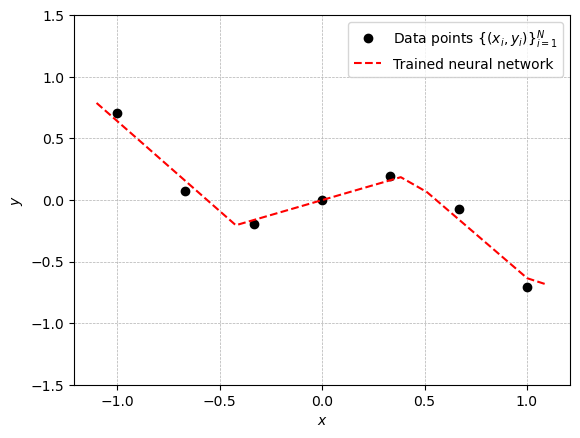

In [20]:
with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Traing loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

__a)__ First, we experiment with the widths ($f_{i}$) and depth ($D$).

Choose widths ($f_{i}$) and depth ($D$) such that:
- the network becomes underparameterized (motive why it is underparameterized)
- the network becomes overparameterized (motive why it is overparameterized)

and train the model as above.

In this subproblem, keep the activation functions fixed as ReLU. However, you are free to experiment with the learning rate and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

In the underdetermined case, we have many parameters to fit for quite simple data, this means that we will get quite a good fit, and a ver low loss. With the overdetermined case, we have less paramers than data, so we will get a "poor" fit and a high loss. Wether it is a good or bad model depends on the use case. The first one will be very over fit, so for such simple data that complex of a model is not needed.

Epoch: 0	Loss: 0.20054829120635986
Epoch: 100	Loss: 0.03629284352064133
Epoch: 200	Loss: 0.011784492060542107
Epoch: 300	Loss: 0.0030668058898299932
Epoch: 400	Loss: 0.0006241253577172756
Epoch: 500	Loss: 0.0002114805392920971
Epoch: 600	Loss: 0.00016009707178454846
Epoch: 700	Loss: 4.028583862236701e-05
Epoch: 800	Loss: 1.275369959330419e-05
Epoch: 900	Loss: 4.060578248754609e-06
Epoch: 1000	Loss: 1.773071176103258e-06
Epoch: 1100	Loss: 1.2624703913388657e-06
Epoch: 1200	Loss: 1.1138325817228178e-06
Epoch: 1300	Loss: 1.0255769211653387e-06
Epoch: 1400	Loss: 9.502116995463439e-07
Epoch: 1500	Loss: 8.807535891719454e-07
Epoch: 1600	Loss: 8.164976748048502e-07
Epoch: 1700	Loss: 7.563365898022312e-07
Epoch: 1800	Loss: 7.008721922829864e-07
Epoch: 1900	Loss: 6.496280207102245e-07
Training loss: 0.00000


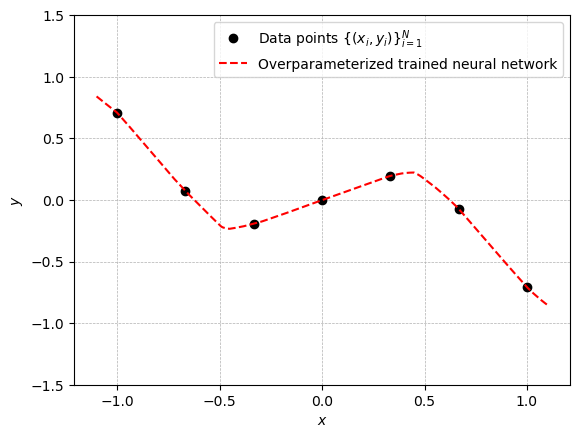

In [21]:
# Underdetermined case
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=100)
        self.linear2 = nn.Linear(in_features=100, out_features=100)
        self.linear3 = nn.Linear(in_features=100, out_features=1)


    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)

        return x


model = model()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)


for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:
        batch_x, batch_y = batch
        pred = model(batch_x)
        loss = loss_fn(pred, batch_y)
        losses_in_epoch.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Overparameterized trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Training loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

Epoch: 0	Loss: 0.2200898826122284
Epoch: 100	Loss: 0.09127175807952881
Epoch: 200	Loss: 0.08667715638875961
Epoch: 300	Loss: 0.0862780436873436
Epoch: 400	Loss: 0.08615975826978683
Epoch: 500	Loss: 0.08112616091966629
Epoch: 600	Loss: 0.07565300166606903
Epoch: 700	Loss: 0.07203086465597153
Epoch: 800	Loss: 0.07039786130189896
Epoch: 900	Loss: 0.0695422813296318
Epoch: 1000	Loss: 0.06878993660211563
Epoch: 1100	Loss: 0.06814540922641754
Epoch: 1200	Loss: 0.06760771572589874
Epoch: 1300	Loss: 0.06717022508382797
Epoch: 1400	Loss: 0.06682242453098297
Epoch: 1500	Loss: 0.06655173748731613
Epoch: 1600	Loss: 0.06634507328271866
Epoch: 1700	Loss: 0.0661899521946907
Epoch: 1800	Loss: 0.06607524305582047
Epoch: 1900	Loss: 0.06599154323339462
Training loss: 0.06593


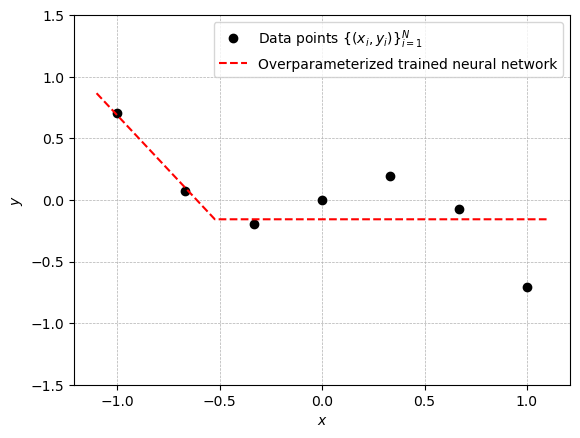

In [22]:
# Underdetermined case
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=2)
        self.linear2 = nn.Linear(in_features=2, out_features=1)



    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x


model = model()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)


for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:
        batch_x, batch_y = batch
        pred = model(batch_x)
        loss = loss_fn(pred, batch_y)
        losses_in_epoch.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Overparameterized trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Training loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

__b)__ Second, we will try out different activation functions ($\sigma_{i}$).

Train two overparameterized networks with the same widths and depth, using
- ReLU activation at each layer for one of the networks, and
- 4 * sigmod activation at each layer for the other network.

You are free to experiment with the learning rate and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

We clearly see that the network trained using ReLU ends up having a lower training loss than the network trained using 4 * sigmod. From the plots we see that the ReLU trained network ends up having a perfect fit to the data, whereas the 4 * sigmod trained network is underfit.

Epoch: 0	Loss: 0.1767709106206894
Epoch: 100	Loss: 0.06193593889474869
Epoch: 200	Loss: 0.05523485690355301
Epoch: 300	Loss: 0.049080587923526764
Epoch: 400	Loss: 0.04162057861685753
Epoch: 500	Loss: 0.03273427113890648
Epoch: 600	Loss: 0.023516712710261345
Epoch: 700	Loss: 0.015068716369569302
Epoch: 800	Loss: 0.008650637231767178
Epoch: 900	Loss: 0.0046082427725195885
Epoch: 1000	Loss: 0.0023370073176920414
Epoch: 1100	Loss: 0.001134005025960505
Epoch: 1200	Loss: 0.0005259119789116085
Epoch: 1300	Loss: 0.00023406925902236253
Epoch: 1400	Loss: 0.00010100605868501589
Epoch: 1500	Loss: 4.268838165444322e-05
Epoch: 1600	Loss: 1.7813286831369624e-05
Epoch: 1700	Loss: 7.381229806924239e-06
Epoch: 1800	Loss: 3.0370244985533645e-06
Epoch: 1900	Loss: 1.2421115798133542e-06
Training loss: 0.00000


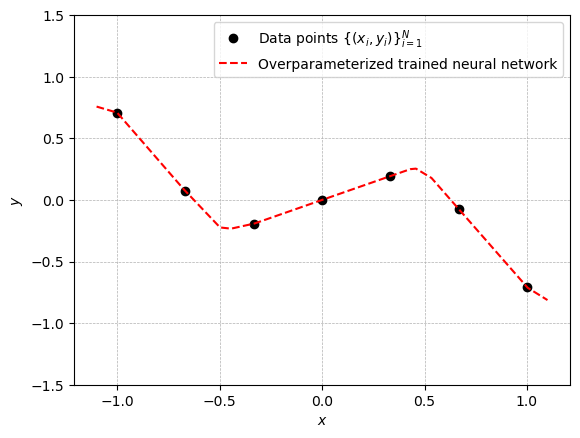

In [23]:
# Write your code here
# Underdetermined case
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=20)
        self.linear2 = nn.Linear(in_features=20, out_features=20)
        self.linear3 = nn.Linear(in_features=20, out_features=1)


    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)

        return x


model = model()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)


for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:
        batch_x, batch_y = batch
        pred = model(batch_x)
        loss = loss_fn(pred, batch_y)
        losses_in_epoch.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Overparameterized trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Training loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

Epoch: 0	Loss: 0.4648127257823944
Epoch: 100	Loss: 0.15582215785980225
Epoch: 200	Loss: 0.15555636584758759
Epoch: 300	Loss: 0.15523190796375275
Epoch: 400	Loss: 0.15475106239318848
Epoch: 500	Loss: 0.15371160209178925
Epoch: 600	Loss: 0.1431039720773697
Epoch: 700	Loss: 0.06985390931367874
Epoch: 800	Loss: 0.0696505680680275
Epoch: 900	Loss: 0.06953953951597214
Epoch: 1000	Loss: 0.06943222880363464
Epoch: 1100	Loss: 0.06932785362005234
Epoch: 1200	Loss: 0.06922586262226105
Epoch: 1300	Loss: 0.06912574917078018
Epoch: 1400	Loss: 0.06902709603309631
Epoch: 1500	Loss: 0.06892947852611542
Epoch: 1600	Loss: 0.06883271038532257
Epoch: 1700	Loss: 0.0687365010380745
Epoch: 1800	Loss: 0.06864067167043686
Epoch: 1900	Loss: 0.06854508072137833
Training loss: 0.06845


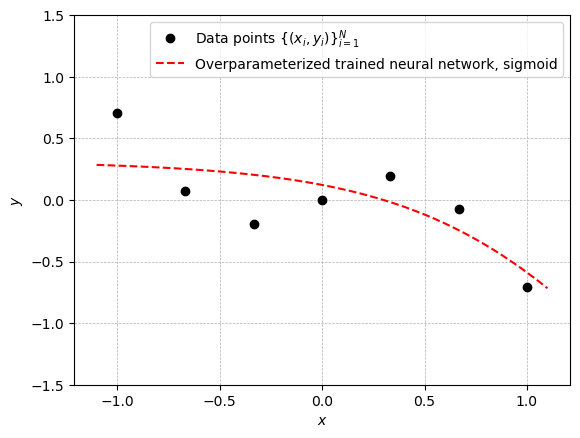

In [24]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=20)
        self.linear2 = nn.Linear(in_features=20, out_features=20)
        self.linear3 = nn.Linear(in_features=20, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = 4*F.sigmoid(x)
        x = self.linear2(x)
        x = 4*F.sigmoid(x)
        x = self.linear3(x)
        return x


model = model()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:
        batch_x, batch_y = batch
        pred = model(batch_x)
        loss = loss_fn(pred, batch_y)
        losses_in_epoch.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Overparameterized trained neural network, sigmoid'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Training loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

__c)__ Third, we consider different initial points ($\theta_{0}$) used in training.


For an overparameterized network with ReLU activation functions at each layer and fixed widths and depth, train it with different initial point (note that the constructor of `nn.Module` will initialize the parameters randomly).

Does the initial point affect the final trained network? Give a qualitative and quantitative analysis.

__Solution:__ 

The trained network is indeed affected by the initial point, which can be seen in the weights and biases, and th different losses. However, the difference is almost negligible, and qualitatively, looking at the plots, they are almost the same, with minor differences.

Epoch: 0	Loss: 0.10663606971502304
Epoch: 100	Loss: 0.057242486625909805
Epoch: 200	Loss: 0.046263959258794785
Epoch: 300	Loss: 0.035423945635557175
Epoch: 400	Loss: 0.023979056626558304
Epoch: 500	Loss: 0.013684278354048729
Epoch: 600	Loss: 0.006649903953075409
Epoch: 700	Loss: 0.0029843742959201336
Epoch: 800	Loss: 0.0013442130293697119
Epoch: 900	Loss: 0.0006441790028475225
Epoch: 1000	Loss: 0.0003098862653132528
Epoch: 1100	Loss: 0.0001463061198592186
Epoch: 1200	Loss: 7.173802441684529e-05
Epoch: 1300	Loss: 3.772438503801823e-05
Epoch: 1400	Loss: 2.1497602574527264e-05
Epoch: 1500	Loss: 1.3485893759934697e-05
Epoch: 1600	Loss: 9.344512363895774e-06
Epoch: 1700	Loss: 7.1142285378300585e-06
Epoch: 1800	Loss: 5.809745289298007e-06
Epoch: 1900	Loss: 4.982378868589876e-06
Training loss: 0.00000


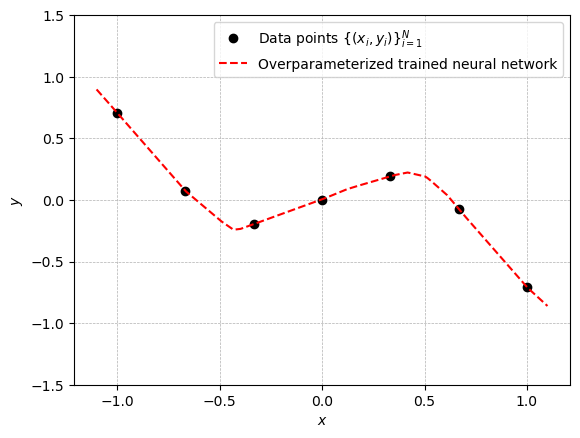

In [25]:
# Write your code here
# Underdetermined case
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=20)
        self.linear2 = nn.Linear(in_features=20, out_features=20)
        self.linear3 = nn.Linear(in_features=20, out_features=1)


    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)

        return x


model = model()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)


for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:
        batch_x, batch_y = batch
        pred = model(batch_x)
        loss = loss_fn(pred, batch_y)
        losses_in_epoch.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Overparameterized trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Training loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

In [26]:
# Hint: The code below prints the parameters of the network 'model'
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

# Write your code here

linear1.weight tensor([[-0.5245],
        [ 0.4823],
        [-0.6921],
        [ 0.0513],
        [-0.7980],
        [-0.4478],
        [ 0.8207],
        [ 0.6633],
        [-1.1238],
        [-0.6666],
        [ 0.0127],
        [-0.7471],
        [ 1.1196],
        [-0.9025],
        [ 0.2064],
        [-0.3470],
        [ 0.7997],
        [ 0.7890],
        [-0.6993],
        [-0.6630]])
linear1.bias tensor([ 0.0055, -0.0765,  0.8818,  0.9995, -0.3406, -0.5229, -0.8208, -0.9254,
        -0.4885, -0.8850, -0.0135,  0.5145, -0.1307, -0.6017, -0.5985, -0.4811,
        -0.4881,  0.3136, -0.7778,  0.6630])
linear2.weight tensor([[-1.2593e-01, -1.2063e-01, -4.5014e-02,  2.0721e-01,  1.6984e-01,
          1.3075e-02,  2.1312e-01,  1.2085e-01,  3.4799e-01,  4.6124e-02,
         -1.8598e-01, -7.3374e-02, -1.3914e-01,  1.7949e-01,  1.2078e-01,
          4.9459e-02, -1.0459e-01,  2.1510e-03,  3.0357e-02, -5.8037e-02],
        [ 1.8546e-01, -5.9737e-02, -1.6636e-01,  1.8648e-01,  1.7687e-01,


Epoch: 0	Loss: 0.16401030123233795
Epoch: 100	Loss: 0.06340400874614716
Epoch: 200	Loss: 0.05114798620343208
Epoch: 300	Loss: 0.0424979068338871
Epoch: 400	Loss: 0.03528415411710739
Epoch: 500	Loss: 0.027333509176969528
Epoch: 600	Loss: 0.01931304670870304
Epoch: 700	Loss: 0.012294762767851353
Epoch: 800	Loss: 0.007144614588469267
Epoch: 900	Loss: 0.003945834003388882
Epoch: 1000	Loss: 0.002089316491037607
Epoch: 1100	Loss: 0.001056418870575726
Epoch: 1200	Loss: 0.0005114212981425226
Epoch: 1300	Loss: 0.00023848800628911704
Epoch: 1400	Loss: 0.00010793469118652865
Epoch: 1500	Loss: 4.7776349674677476e-05
Epoch: 1600	Loss: 2.081340608128812e-05
Epoch: 1700	Loss: 9.169708391709719e-06
Epoch: 1800	Loss: 4.028169769298984e-06
Epoch: 1900	Loss: 1.7595699546291144e-06
Training loss: 0.00000


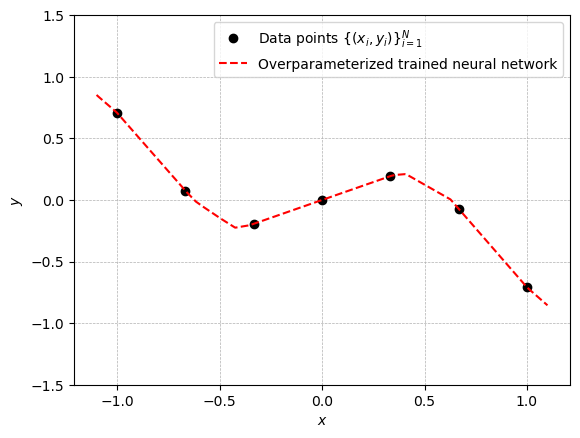

In [27]:
# Write your code here
# Underdetermined case
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=20)
        self.linear2 = nn.Linear(in_features=20, out_features=20)
        self.linear3 = nn.Linear(in_features=20, out_features=1)


    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)

        return x


model = model()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)


for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:
        batch_x, batch_y = batch
        pred = model(batch_x)
        loss = loss_fn(pred, batch_y)
        losses_in_epoch.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Overparameterized trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Training loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

In [28]:
# Hint: The code below prints the parameters of the network 'model'
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

# Write your code here

linear1.weight tensor([[-0.8970],
        [-0.6256],
        [-0.2633],
        [-0.5273],
        [ 1.0574],
        [ 0.6953],
        [-0.4671],
        [ 0.5643],
        [-0.0701],
        [ 0.4264],
        [-1.1929],
        [ 0.5219],
        [-0.3142],
        [-0.8095],
        [ 0.9503],
        [-0.5712],
        [ 0.5208],
        [-0.0929],
        [ 0.0692],
        [-0.3394]])
linear1.bias tensor([-0.9829, -0.6257, -0.1560,  0.9602, -0.6628,  0.2474,  0.5698, -0.7616,
         0.4170, -0.1456, -0.5054, -0.7366,  0.3134, -0.8107,  0.9531,  0.5647,
        -0.5219, -0.4414, -0.7783,  0.3428])
linear2.weight tensor([[ 2.1748e-01, -1.4933e-01,  6.6162e-02, -4.0175e-02, -2.6808e-01,
          3.8696e-01, -1.4463e-01,  1.5037e-01,  1.6434e-01, -2.8393e-01,
          4.6041e-01,  1.1419e-01, -1.0463e-01, -4.4474e-03, -1.1485e-01,
          8.7502e-02, -5.0441e-02, -1.7707e-01, -1.7317e-01, -1.9402e-03],
        [-1.9704e-01,  6.3819e-02,  5.5064e-02,  4.3877e-02, -5.3470e-02,


__d)__ Fourth, we consider different training algorithms.

Compare
- SGD, and
- Adam (`optimizer = optim.Adam(model.parameters(), lr=0.1)`)

for an overparameterized network with ReLU activation functions at each layer and fixed widths and depth.

You are free to experiment with the learning rates and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

In this non complex problem both SGD and Adam give losses that are estentially 0, and the model is well fitted to all the data points. So for this simple problem it is hard to tell any difference, however in general it has been observed that Adam sometimes give woorse generalization than SGD.

Epoch: 0	Loss: 0.18454231321811676
Epoch: 100	Loss: 2.482879426679574e-05
Epoch: 200	Loss: 1.7859790313323742e-09
Epoch: 300	Loss: 2.479099391050621e-11
Epoch: 400	Loss: 1.9340716335136676e-06
Epoch: 500	Loss: 3.248185748150334e-11
Epoch: 600	Loss: 7.938538146845531e-07
Epoch: 700	Loss: 1.5539713515977382e-08
Epoch: 800	Loss: 4.138139830800469e-11
Epoch: 900	Loss: 0.00011385884863557294
Epoch: 1000	Loss: 6.081802172985817e-09
Epoch: 1100	Loss: 4.986788065819425e-11
Epoch: 1200	Loss: 0.00019671399786602706
Epoch: 1300	Loss: 1.8778734123259255e-10
Epoch: 1400	Loss: 6.34702151947053e-11
Epoch: 1500	Loss: 5.931473368026019e-11
Epoch: 1600	Loss: 2.1380150428740308e-05
Epoch: 1700	Loss: 4.875855830199782e-10
Epoch: 1800	Loss: 2.6740729422436438e-11
Epoch: 1900	Loss: 1.9888747593288514e-10
Training loss: 0.00000


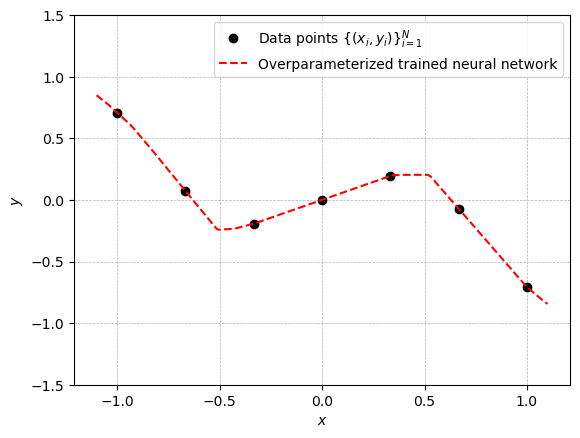

In [29]:
# Write your code here
# Write your code here
# Underdetermined case
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=20)
        self.linear2 = nn.Linear(in_features=20, out_features=20)
        self.linear3 = nn.Linear(in_features=20, out_features=1)


    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)

        return x


model = model()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:
        batch_x, batch_y = batch
        pred = model(batch_x)
        loss = loss_fn(pred, batch_y)
        losses_in_epoch.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Overparameterized trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Training loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

__e)__ Fifth, we study the loss landscape of a trained network along different directions in parameter space.  


Train an overparameterized network with ReLU activation functions at each layer. Denote it by $m(\cdot,\theta^{*})$ where $\theta^{*}$ are the learned parameters. Sample $\Delta$, with the same size as $\theta^{*}$, from a standard normal distribution (and keep it fixed). Plot 

$$
\begin{align*}
    \frac{1}{N}\sum_{i=1}^N L\left(m\left(x_i;\theta^{*} + t \Delta\right),y_i\right)
\end{align*}
$$

as a function of $t\in[-1,1]$ (or even a larger interval). 

Do the same for another network with the same widths and depth, but using 4 * sigmoid activation functions at each layer. 

How does these two cases differ? Give a qualitative analysis. 

_Hints:_ You can get the parameters as a dictionary of a model by using `model.state_dict()`, updating the parameters in the dictionary, and then loading the updated parameters into the model using `model.load_state_dict(...)`. If you use this approach it is helpful to know the difference between [a shallow copy and a deep copy of a dictionary](https://thispointer.com/python-how-to-copy-a-dictionary-shallow-copy-vs-deep-copy/) You might need to cut off values of the loss that are too high to get a nice plot.

_Optional:_ Plot in two direction at the same time, i.e. plot 
$$
\begin{align*}
    \frac{1}{N}\sum_{i=1}^N L\left(m\left(x_i;\theta^{*} + t \Delta_{t} + s \Delta_{s}\right),y_i\right)
\end{align*}
$$

as a function of $t,s\in[-1,1]$. 

__Solution:__ 

With SGD+ReLU we see a very distinct minima, and a very flat one. With SGD+4sigmoid we dont see a very distinct minima, although it looks quite flat towrds the end.

Epoch: 0	Loss: 0.1702532321214676
Epoch: 100	Loss: 0.07023514062166214
Epoch: 200	Loss: 0.06408146023750305
Epoch: 300	Loss: 0.05607450008392334
Epoch: 400	Loss: 0.03805534169077873
Epoch: 500	Loss: 0.02500772662460804
Epoch: 600	Loss: 0.024162964895367622
Epoch: 700	Loss: 0.013385486789047718
Epoch: 800	Loss: 0.0053561097010970116
Epoch: 900	Loss: 0.0014171994989737868
Epoch: 1000	Loss: 0.0004548116121441126
Epoch: 1100	Loss: 3.76200296159368e-05
Epoch: 1200	Loss: 8.756855436331534e-07
Epoch: 1300	Loss: 2.7109363642807693e-08
Epoch: 1400	Loss: 3.251065638920636e-09
Epoch: 1500	Loss: 1.1775914687817135e-09
Epoch: 1600	Loss: 4.543035392323702e-10
Epoch: 1700	Loss: 1.742150174122159e-10
Epoch: 1800	Loss: 7.626160813956062e-11
Epoch: 1900	Loss: 4.0208503193639444e-11


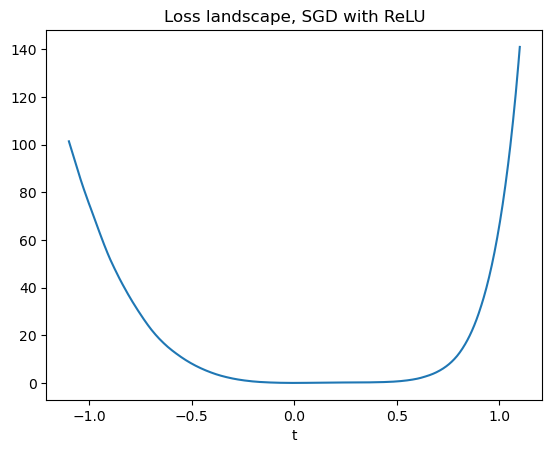

In [31]:
import copy

class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=10)
        self.linear3 = nn.Linear(in_features=10, out_features=10)
        self.linear4 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        x = F.relu(x)
        x = self.linear4(x)
        return x

model = model()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:
        batch_x, batch_y = batch    
        pred = model(batch_x)   
        loss = loss_fn(pred, batch_y)       
        losses_in_epoch.append(loss)     
        loss.backward()      
        optimizer.step()       
        optimizer.zero_grad()

    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))
        
    theta_star = copy.deepcopy(model.state_dict())
    delta = {}

    for i in theta_star.keys():
        delta[i] = np.random.normal(0,1,np.shape(theta_star[i]))

t_vec = np.linspace(-1,1,1000)
avg_loss_vec = []

for t in t_vec:
    
    for batch in data_loader:
        batch_x,batch_y = batch
        new_thetas = {}
        loss_vec = []
        for i in theta_star.keys():
            new_thetas[i] = theta_star[i] + t*delta[i]
            
        model.load_state_dict(new_thetas)
        
        new_pred = model(batch_x)
        
        loss = loss_fn(new_pred,batch_y).detach().numpy()
        loss_vec.append(loss)
        avg_loss_vec.append(np.mean(loss_vec))
        
with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(x,avg_loss_vec)
    plt.title("Loss landscape, SGD with ReLU")
    plt.xlabel("t")

Epoch: 0	Loss: 9.886260032653809
Epoch: 100	Loss: 0.15512977540493011
Epoch: 200	Loss: 0.1537185162305832
Epoch: 300	Loss: 0.3903885781764984
Epoch: 400	Loss: 0.07486527413129807
Epoch: 500	Loss: 0.07108113169670105
Epoch: 600	Loss: 0.07095353305339813
Epoch: 700	Loss: 0.07251498848199844
Epoch: 800	Loss: 0.0710357278585434
Epoch: 900	Loss: 0.0697082132101059
Epoch: 1000	Loss: 0.06852800399065018
Epoch: 1100	Loss: 0.06759171932935715
Epoch: 1200	Loss: 0.06699836999177933
Epoch: 1300	Loss: 0.06674268841743469
Epoch: 1400	Loss: 0.0664956197142601
Epoch: 1500	Loss: 0.06604047864675522
Epoch: 1600	Loss: 0.06546146422624588
Epoch: 1700	Loss: 0.06481991708278656
Epoch: 1800	Loss: 0.06412104517221451
Epoch: 1900	Loss: 0.06333072483539581


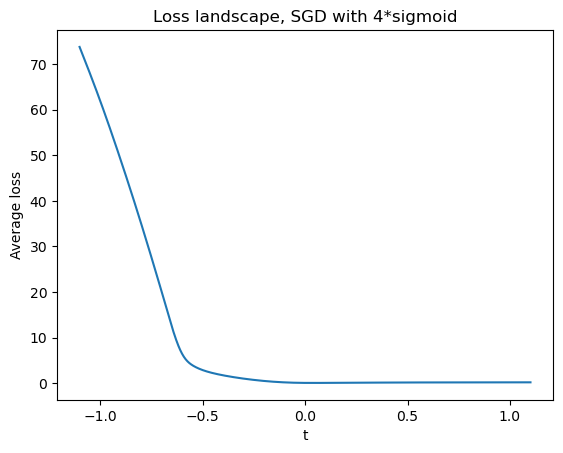

In [33]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=10)
        self.linear3 = nn.Linear(in_features=10, out_features=10)
        self.linear4 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = 4*F.sigmoid(x)
        x = self.linear2(x)
        x = 4*F.sigmoid(x)
        x = self.linear3(x)
        x = 4*F.sigmoid(x)
        x = self.linear4(x)
        return x

model = model()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader: 
        batch_x, batch_y = batch
        pred = model(batch_x) 
        loss = loss_fn(pred, batch_y)  
        losses_in_epoch.append(loss)   
        loss.backward()   
        optimizer.step()    
        optimizer.zero_grad()
        
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))
    
    theta_star = copy.deepcopy(model.state_dict())
    delta = {}

    for i in theta_star.keys():
        delta[i] = np.random.normal(0,1,np.shape(theta_star[i]))

t_vec = np.linspace(-1,1,1000)
avg_loss_vec = []

for t in t_vec:
    
    for batch in data_loader:
        batch_x,batch_y = batch
        new_thetas = {}
        loss_vec = []
        for i in theta_star.keys():
            new_thetas[i] = theta_star[i] + t*delta[i]
            
        model.load_state_dict(new_thetas)
        
        new_pred = model(batch_x)
        
        loss = loss_fn(new_pred,batch_y).detach().numpy()
        loss_vec.append(loss)
        avg_loss_vec.append(np.mean(loss_vec))
        
with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(x,avg_loss_vec)
    plt.title("Loss landscape, SGD with 4*sigmoid")
    plt.ylabel("Average loss")
    plt.xlabel("t")

---
### Exercise 4: Implicit regularization via small norm in polynomial fitting in $\mathbb{R}$
_Remark:_ You should solve this exercise using `numpy` primarily.

The purpose of this exercise is to study optimization problems in the overparameterized regime, i.e., when there are multiple solutions to choose from, and see how the norm of a given solution may affect generalization.   

Again, we consider the data points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:

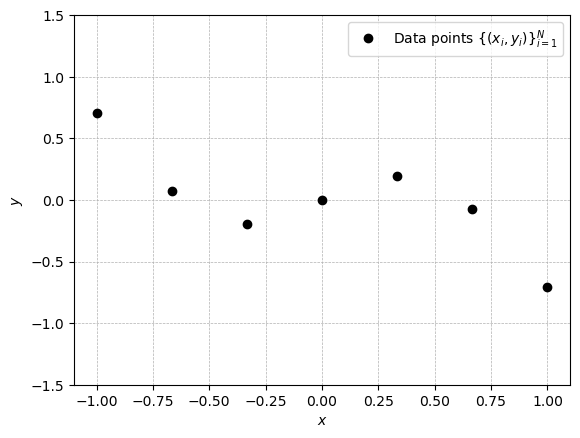

In [43]:
N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

We wish to fit a polynomial model $m(\cdot;\theta)$ of degree $n=9$ (overparameterized) to the data points  $\{(x_{i},y_{i})\}_{i=1}^{N}$. One solution $m(\cdot;\theta^{*})$ is given below:

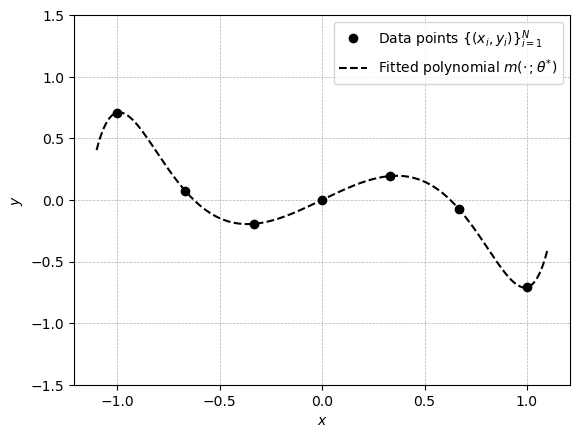

In [44]:
theta_star = np.array([0,  0.8, 0, -1.9, 0, -0.583957507, 0, 0.28, 0, 0.695322536])
x = np.linspace(-1.1, 1.1, num = 1000)

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_star), x),'k--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Fitted polynomial $m(\cdot\,;\theta^{*})$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

---

__a)__ Recall from __Exercise 1__ __g)__ that given a candidate point $a\in\mathbb{R}^{n+1}$, we can obtain a solution via the Euclidean projection formula $\theta^{*} = a - X^{T}(XX^{T})^{-1}(Xa-Y)$. Initialize $a$ randomly and compute the projection $\theta^{*}$ and plot the fitted polynomial $m(\cdot;\theta^{*})$ as above. Vary the magnitude or norm of $\theta^{*}$ indirectly by multiplying $a$ by $0$, $10$, $100$ and $1000$. Visually, how does the generalization of $m(\cdot;\theta^{*})$ correspond to the norm of $\theta^{*}$?

__Solution:__ 

Wee see that all models do indeed fit the points perfectly, which would mean a loss of 0. However, the models with higher norm of $\theta^{*}$ are unreasonable with polynomial fits of higher degree which unlikely would be something one wants in practice. This will not generalize well to new data points.

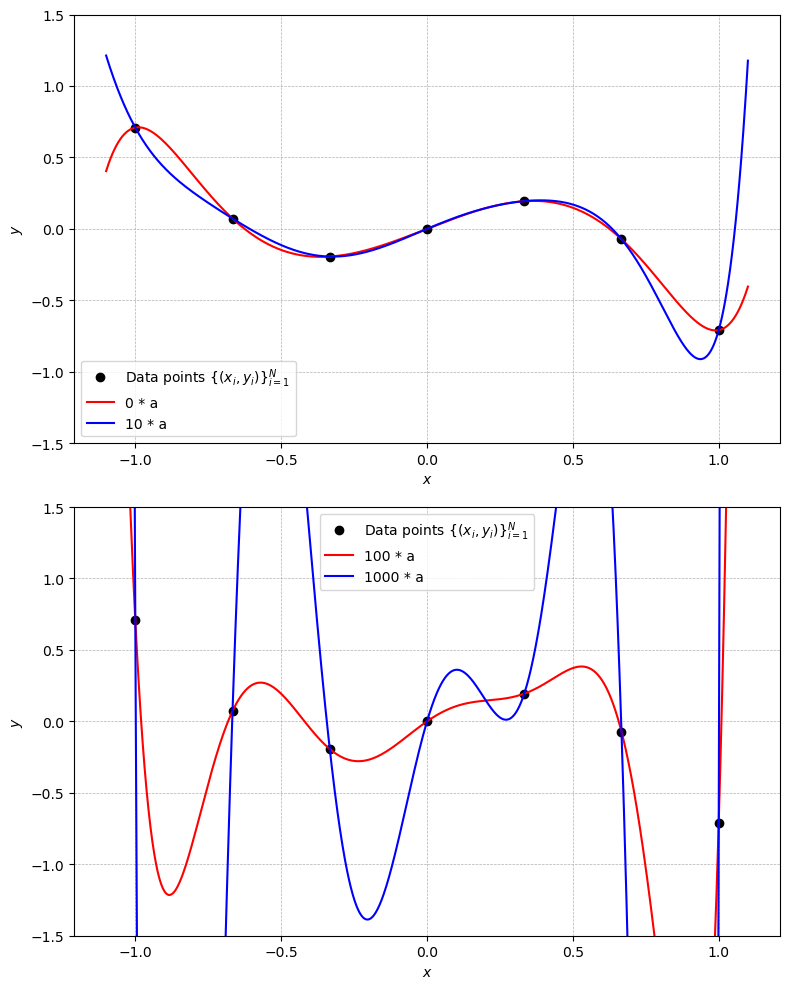

In [83]:
# Given variables
n = 9  # degree of polynomial

# Function to compute theta_star given a
def compute_theta_star(a, X, Y, H_inv = np.eye(n + 1)):
    return a - H_inv @ X.T @ np.linalg.inv(X @ H_inv @X.T) @ (X @ a - Y)

# Initialize random a and X, Y for polynomial fitting
a = np.random.randn(n + 1)
X = create_X(xs, n)
Y = ys

# Multipliers for 'a'
multipliers = [0, 10, 100, 1000]

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(8, 10), dpi=100)

# Plot the data points
axes[0].plot(xs, ys, 'ko', label=r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$')
axes[1].plot(xs, ys, 'ko', label=r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$')

# Loop for different multipliers of 'a'
colors = ['r', 'b', 'g', 'purple']
for i, mult in enumerate(multipliers[:2]):
    a_mult = a * mult
    theta_star = compute_theta_star(a_mult, X, Y)
    axes[0].plot(x, np.polyval(np.flip(theta_star), x), colors[i], label=f'{mult} * a')

for i, mult in enumerate(multipliers[2:]):
    a_mult = a * mult
    theta_star = compute_theta_star(a_mult, X, Y)
    axes[1].plot(x, np.polyval(np.flip(theta_star), x), colors[i], label=f'{mult} * a')

# Set common properties
for ax in axes:
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.grid(linestyle='dashed', linewidth=0.5)
    ax.set_ylim([-1.5, 1.5])
    ax.legend()

plt.tight_layout()
plt.show()


__b)__ Implement the GD method for optimization problem (2) in __Exercise 1__ above, starting at $\theta_{0}=0$, using step size $\gamma_{k} = 1/\beta$, and verify that the resulting sequence $\{\theta_{k}\}_{k\geq0}$ converges to $\theta^{*}$, where $\theta^{*}$ is the Euclidean projection starting from the candidate point $a=0$. I.e., the GD method converges to the solution with the smallest norm. Do this by plotting $||\theta_{k}-\theta^{*}||_{2}^{2}$ as a function of $k$ in log-linear scale.

_Remark:_ We consider $\theta_{k}$ to have converged to $\theta^{*}$ if $||\theta_{k}-\theta^{*}||_{2}^{2} \leq 10^{-16}$.


__Solution:__ 

We see in the plot that GD converges to the solution with the smallest norm after about 30k iterations.

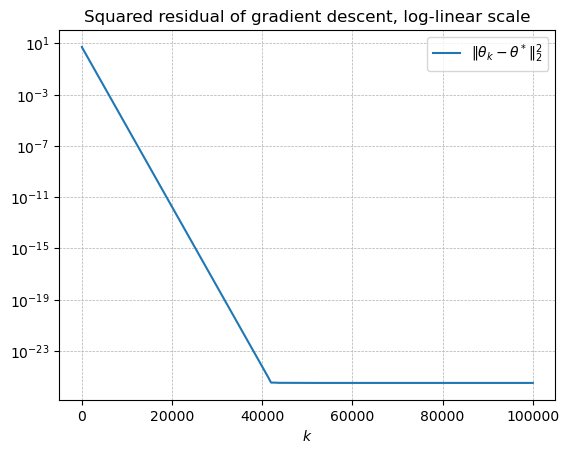

In [84]:
# Write your code here
theta0 = np.zeros(10)
theta_opt = compute_theta_star(a*0, X, Y)
_, _, _, thetas = gradient_descent(theta0,X,Y, N, 10**5, return_all_thetas=True)

res_norm_squared = []
for theta in thetas:
    res_norm_squared.append(np.linalg.norm(theta-theta_opt)**2)

fig, axes = plt.subplots(dpi=100)
axes.set_xlabel('$k$')
plt.yscale("log")
axes.grid(linestyle='dashed', linewidth=0.5)
plt.plot(res_norm_squared,label = r'$\| \theta_k - \theta^*\|_2^2$')
plt.legend()
plt.title("Squared residual of gradient descent, log-linear scale")
plt.show()


---

__c)__ Implement the SGD method for optimization problem (1) in __Exercise 1__ above, starting at $\theta_{0}=0$, using step size $\gamma_{k} = 0.1 / \beta$, and verify that the resulting sequence $\{\theta_{k}\}_{k\geq0}$ converges to $\theta^{*}$, where $\theta^{*}$ is the Euclidean projection starting from the candidate point $a=0$. I.e., the SGD method converges to the solution with the smallest norm. Do this by plotting $||\theta_{k}-\theta^{*}||_{2}^{2}$ as a function of $k$ in log-linear scale.


__Solution:__ 


Indeed the stochastich gradient descent converges to the solution with the smallest norm, however after many more iterations the the standard gradient descent.

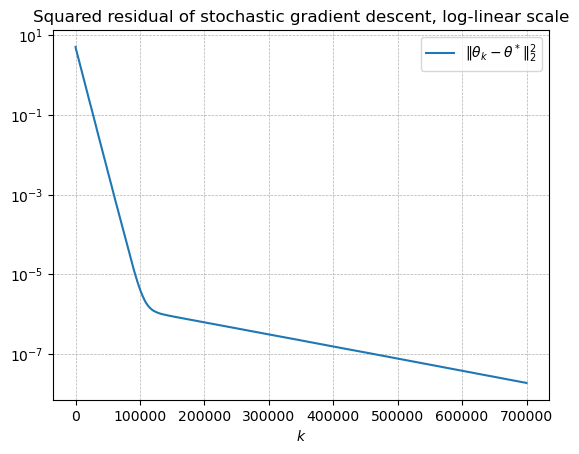

In [85]:
# Write your code here
_, _, _, thetas = stoch_gradient_descent(theta0, X, Y, N, N*10**5, gamma_1, return_all_thetas=True)

res_norm_squared = []
for theta in thetas:
    res_norm_squared.append(np.linalg.norm(theta-theta_opt)**2)

fig, axes = plt.subplots(dpi=100)
axes.set_xlabel('$k$')
plt.yscale("log")
axes.grid(linestyle='dashed', linewidth=0.5)
plt.plot(res_norm_squared,label = r'$\| \theta_k - \theta^*\|_2^2$')
plt.legend()
plt.title("Squared residual of stochastic gradient descent, log-linear scale")
plt.show()


---

__d)__ The ADAM optimization method is given by:

- Pick $\theta_{0}\in\mathbb{R}^{n+1}$, $\hat{m}_{0}=\hat{v}_{0}=0\in\mathbb{R}^{n+1}$, $b_{m},b_{v}\in(0,1)$ and $\gamma,\epsilon>0$.
- For $k\geq 0$:
    - Pick $i\in\{1,\ldots, N\}$ uniformly at random
    - Set $g_{k+1} = \nabla f_{i}(\theta_{k})$
    - Set $\hat{m}_{k+1} = b_{m}\hat{m}_{k}+(1-b_{m})g_{k+1}$
    - Set $\hat{v}_{k+1} = b_{v}\hat{v}_{k}+(1-b_{v})g_{k+1}^{2}$ (element-wise square)
    - Set $m_{k+1}=\hat{m}_{k+1}/(1-b_{m}^{k+1})$
    - Set $v_{k+1}=\hat{v}_{k+1}/(1-b_{v}^{k+1})$
    - Set $\theta_{k+1} = \theta_{k} - \gamma m_{k+1} ./ (\sqrt{v_{k+1}} + \epsilon\mathbb{1})$ (element-wise division and square root)

Use the [suggested values](https://arxiv.org/pdf/1412.6980.pdf):

- $b_{m} = 0.9$
- $b_{v} = 0.999$
- $\gamma = 0.001$
- $\epsilon = 10^{-8}$

Implement the ADAM optimization method for optimization problem (1) in __Exercise 1__ above, starting at $\theta_{0}=0$. Does ADAM converge to the minimum norm solution? Plot the resulting model.

__Solution:__ 


The ADAM optimizer does not seem to converge to the minimum, as the criterion $||\theta_{k}-\theta^{*}||_{2}^{2} \leq 10^{-16}$ is not met.

In [113]:
# Write your code here
def adam_optimizer(theta, X, Y, N, max_iter, theta_star=None, return_all_thetas=False):
    """
    Perform optimization using the ADAM method to minimize the least squares objective function.
    
    Parameters:
    theta (numpy array): Initial parameter vector.
    X (numpy array): Design matrix of features.
    Y (numpy array): Target vector.
    N (int): Number of data points.
    max_iter (int): Maximum number of iterations.
    theta_star (numpy array, optional): The optimal parameter vector, if known.
    return_all_thetas (bool, optional): Whether to return all intermediate theta values.
    
    Returns:
    tuple: Final parameter vector (theta), suboptimality values, 
           and average suboptimality values over iterations.
    """
    theta_avg = theta.copy()  # Initialize average theta
    if return_all_thetas:
        all_thetas = [theta.copy()]
    
    # Hyperparameters (suggested values from the ADAM paper)
    b_m = 0.9
    b_v = 0.999
    gamma = 0.001
    epsilon = 1e-8

    # Initialize the first and second moment vectors
    m_hat = np.zeros_like(theta)  # Biased first moment estimate
    v_hat = np.zeros_like(theta)  # Biased second raw moment estimate

    f_star = 0 if theta_star is None else compute_f(theta_star, X, Y, N)  # Optimal function value

    # Lists to store suboptimality values at each iteration
    suboptimality = [compute_f(theta, X, Y, N) - f_star]
    avg_suboptimality = [suboptimality[0]]
    
    # ADAM optimization loop
    for k in range(max_iter):
        i = np.random.randint(0, N)
        g = grad_f_i(theta, X, Y, i)
        

        m_hat = b_m * m_hat + (1 - b_m) * g
        v_hat = b_v * v_hat + (1 - b_v) * (g ** 2)
        m_t = m_hat / (1 - b_m ** (k + 1))
        v_t = v_hat / (1 - b_v ** (k + 1))
        
        theta = theta - gamma * m_t / (np.sqrt(v_t) + epsilon)
        
        if return_all_thetas:
            all_thetas.append(theta.copy())
        
        # Update the average of the iterates
        theta_avg = (k * theta_avg + theta) / (k + 1)
        
        # Compute and store suboptimality values
        suboptimality.append(compute_f(theta, X, Y, N) - f_star)
        avg_suboptimality.append(compute_f(theta_avg, X, Y, N) - f_star)
    
    if return_all_thetas:
        return theta, suboptimality, avg_suboptimality, all_thetas
    
    return theta, suboptimality, avg_suboptimality


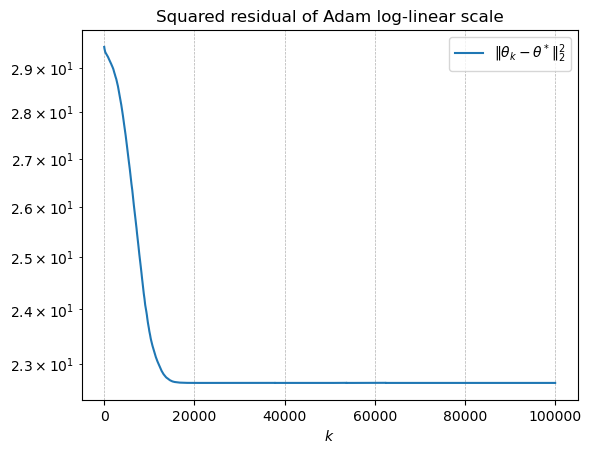

In [114]:
_,_,_, thetas = adam_optimizer(theta0, X, Y, N, 10**5, theta_star=None, return_all_thetas=True)

res_norm_squared = []
for theta in thetas:
    res_norm_squared.append(np.linalg.norm(theta-theta_opt)**2)

fig, axes = plt.subplots(dpi=100)
axes.set_xlabel('$k$')
plt.yscale("log")
axes.grid(linestyle='dashed', linewidth=0.5)
plt.plot(res_norm_squared,label = r'$\| \theta_k - \theta^*\|_2^2$')
plt.legend()
plt.title("Squared residual of Adam log-linear scale")
plt.show()

---

__e)__ The ADAM optimization method scales the gradient independently in each coordinate. We call such methods diagonally scaled methods. 

Now, recall the scaled projection problem from __Exercise 1__ __g)__ above: given a candidate point $a\in\mathbb{R}^{n+1}$, we can obtain a solution via the scaled projection formula $\theta^{*} = a - H^{-1}X^{T}(X H^{-1} X^{T})^{-1}(Xa-Y)$.


Consider the candidate point $a\in\mathbb{R}^{n+1}$ and the highly skewed diagonal scaling matrix $H\in\mathbb{S}^{n+1}_{++}$ below:

In [115]:
a = np.zeros(n + 1)
H_inv = np.diag(np.logspace(-10, 10, num = n + 1)) # the inverse of H

Plot the data points $\{(x_{i},y_{i})\}_{i=1}^{N}$ and the fitted polynomial $m(\cdot;\theta^{*})$ in the same figure using the scaled projection formula. Visually, does the fitted polynomial $m(\cdot;\theta^{*})$ seem to generalize well?

__Solution:__ 

No, we see that we get a polynomial that is severlyly overfitted to the data points, that will not generalize well.

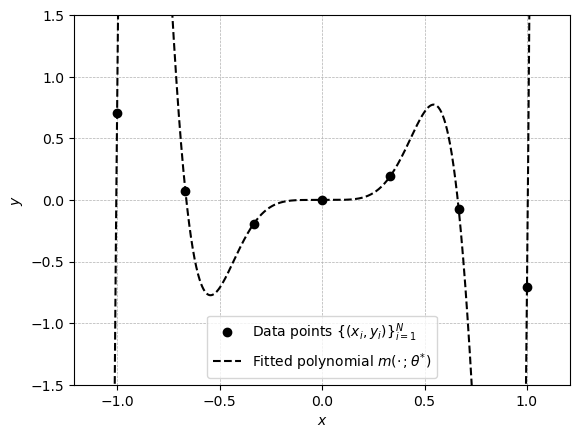

In [116]:
# Write your code here
theta_opt = compute_theta_star(np.zeros(n+1), X, Y, H_inv=H_inv)

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_opt), x),'k--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Fitted polynomial $m(\cdot\,;\theta^{*})$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

---

__f)__ The scaled GD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$ and $H\in\mathbb{S}_{+}^{n+1}$
- For $k\geq 0$:
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} H^{-1}\nabla f(\theta_{k})$ for some $\gamma_{k}>0$.

For numerical reasons (i.e., so that the algorithm converges in reasonable time), consider the less skewed diagonal scaling matrix below:

In [117]:
H_inv = np.diag(np.logspace(-3, 0, num = n + 1)) # the inverse of H

Starting at $\theta_{0}=0$ and using the step size $\gamma_{k}=1/\beta_{H}$, show that the scaled GD method converges to the scaled projection point $\theta^{*}=a - H^{-1}X^{T}(X H^{-1} X^{T})^{-1}(Xa-Y)$ for $a=0$.

Here, $\beta_{H}$ is given by

\begin{align}
    \beta_{H} = \frac{2}{N}\left\lVert H^{-\frac{1}{2}}X^{T}X H^{-\frac{1}{2}} \right\rVert_{2},
\end{align}

where $H^{-\frac{1}{2}}$ is the symmetric square root of $H^{-1}$.

__Solution:__ 

In the plot we see that the scaled gradient does converge after about 300k iterations, meeting the criterion $||\theta_{k}-\theta^{*}||_{2}^{2} \leq 10^{-16}$.

In [119]:
# Write your code 
# Not proper functions like before, too lazy. Kind of selfexplanatiory.

def betah(H_inv, X, N):
    """
    Compute the Lipschitz constant beta_H for the scaled gradient descent method.

    Parameters:
    H_inv (numpy array): Inverse of the scaling matrix H (assumed diagonal of shape (n+1, n+1)).
    X (numpy array): Design matrix of shape (N, n+1).
    N (int): Number of data points.

    Returns:
    float: The Lipschitz constant beta_H.
    """

    return (2/N)*np.linalg.norm(np.sqrt(H_inv) @ X.T @ X @ np.sqrt(H_inv),2)


def scaled_gradient_descent(theta_0, X, Y, N=7, max_iter=500000):
    """
    Perform scaled gradient descent to minimize the least squares objective function.

    Parameters:
    theta_0 (numpy array): Initial parameter vector of shape (n+1,).
    X (numpy array): Design matrix of shape (N, n+1).
    Y (numpy array): Target vector of shape (N,).
    N (int): Number of data points.
    max_iter (int, optional): Maximum number of iterations. Default is 500,000.

    Returns:
    list of numpy arrays: List containing theta vectors at each iteration.
    """
    beta_H = betah(H_inv, X, N)
    
    theta_k = theta_0.copy()
    theta_list = [theta_k.copy()]

    for i in range(max_iter):
        
        gradient = grad_f(theta_k, X, Y, N)  # 'grad_f' is assumed to be defined elsewhere
        theta_k = theta_k - (1 / beta_H) * H_inv @ gradient
        theta_list.append(theta_k.copy())

    return theta_list

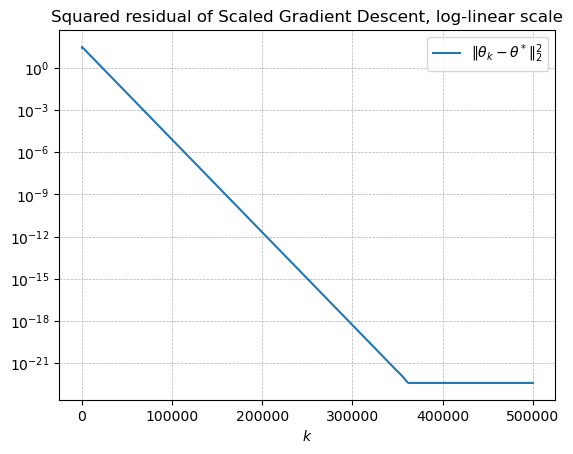

In [120]:
n = 9
theta0 = np.zeros(n+1)
X = create_X(xs, n)
Y = ys

thetas = scaled_gradient_descent(theta0,X,Y)
theta_opt = compute_theta_star(np.zeros(n+1), X, Y, H_inv=H_inv)

res_norm_squared = []
for theta in thetas:
    res_norm_squared.append(np.linalg.norm(theta-theta_opt)**2)
    
fig, axes = plt.subplots(dpi=100)
axes.set_xlabel('$k$')
plt.yscale("log")
axes.grid(linestyle='dashed', linewidth=0.5)
plt.plot(res_norm_squared,label = r'$\| \theta_k - \theta^*\|_2^2$')
plt.legend()
plt.title("Squared residual of Scaled Gradient Descent, log-linear scale")
plt.show()

---
### Exercise 5: Implicit regularization via flatness
_Remark:_ You should solve this exercise using `numpy` primarily.

It has been observed in the [literature](https://arxiv.org/pdf/1609.04836.pdf) that flat mimima tend to lead to better generalization than sharp minima. In this exercise, we empirically verfiy that SGD tends to favour flat mimima.

Consider the finite-sum problem problem
$$
\begin{equation}
\begin{aligned}
& \underset{x\in\mathbb{R}}{\mathrm{minimize}}
& & f(x)= \frac{1}{N} \sum_{i=1}^{N}f_{i}(x)
\end{aligned}
\end{equation}
$$
where the $f_{i}$'s and $f$ are given below: (the derivatives are also given for convenience.)

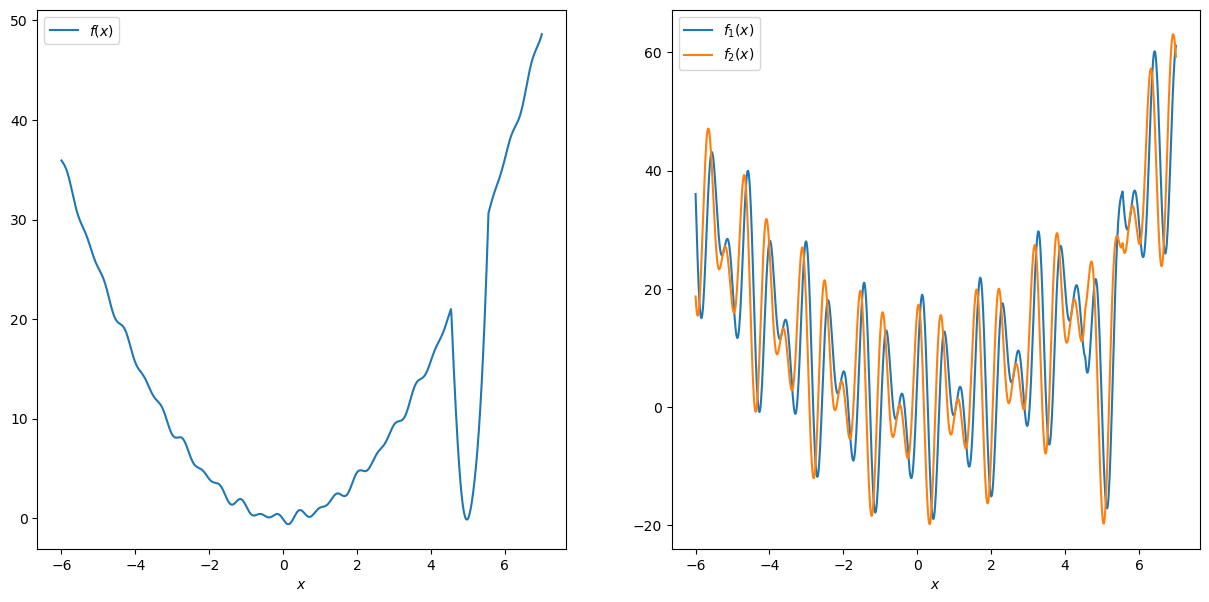

In [126]:
from functools import partial

def loss_term(phase, x):
    if x < 50/11:
        value = x**2
    elif x < 50/9:
        value = 100*(x - 5)**2
    else:
        value = x**2
    return value + 20*np.sin(10*x + phase)*np.cos(2*(x - 5))

def derivative_of_loss_term(phase, x):
    if x < 50/11:
        value = 2*x
    elif x < 50/9:
        value = 200*(x - 5)
    else:
        value = 2*x
    return value + 20*(10*np.cos(10*x + phase)*np.cos(2*(x - 5)) - 2*np.sin(10*x + phase)*np.sin(2*(x - 5)))

N = 2000 # the number of summands
np.random.seed(0)
phases = 2 * np.pi * np.random.rand(N)

# The induvidual summands f_i as a list
f_i_s = list(map(lambda phase : np.vectorize(partial(loss_term, phase)), phases))

# The function f
f = np.vectorize(lambda x : np.mean([f_i(x) for f_i in f_i_s]))

# Derivatives are provided for convenience
derivative_f_i_s = list(map(lambda phase : np.vectorize(partial(derivative_of_loss_term, phase)), phases))
derivative_f = np.vectorize(lambda x : np.mean([d_f_i(x) for d_f_i in derivative_f_i_s]))

x = np.linspace(-6, 7, num=1000)
y_1 = f_i_s[0](x)
y_2 = f_i_s[1](x)
y = f(x)

fig, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].plot(x, y)
axes[0].legend(["$f(x)$"])
axes[0].set_xlabel('$x$')
axes[1].plot(x, y_1)
axes[1].plot(x, y_2)
axes[1].legend(["$f_{1}(x)$", "$f_{2}(x)$"])
axes[1].set_xlabel('$x$');

Note that the function $f$ has a flat minimum close to $0$ and a sharp minimum close to $5$. Implement both GD and SGD for this problem: 

- Start at $x_{0}=5$, i.e., close to the sharp minimum. 
- Let both GD and SGD go for $2000$ iterations.
- Use the same constant step size $\gamma_{k} = 0.001$ for SGD and GD. 
- You should notice that SDG manages to escape the sharp minimum and find the flat minimum (most of the time), while GD does not. Illustrate this by plotting $x_{k}$ as a function of $k$ for both methods.  (Common mistake: We are not asking for $f(x_k)$ vs $x_k$.)

Give some brief comments.

__Solution:__

Clearly in the plots wee the the GD optimizert does not manage to escape the sharp minimum, and stays around $x=5$. But as expected, SGD manages to escape the sharp minimum and find the flat minimum around x=0.

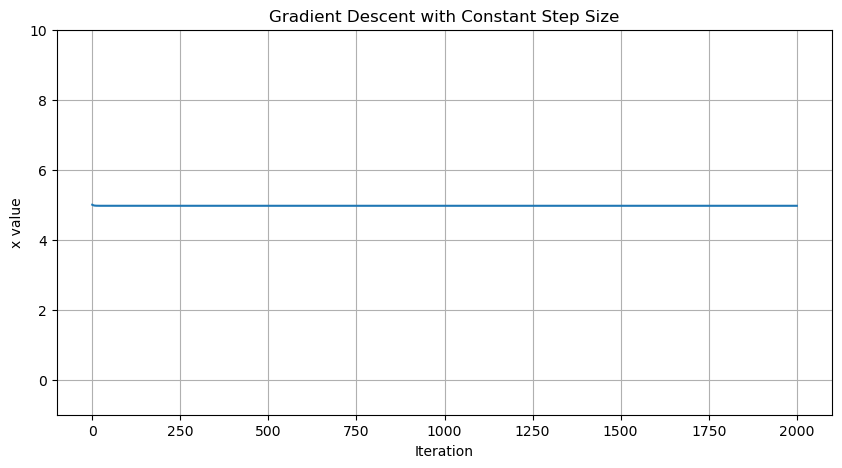

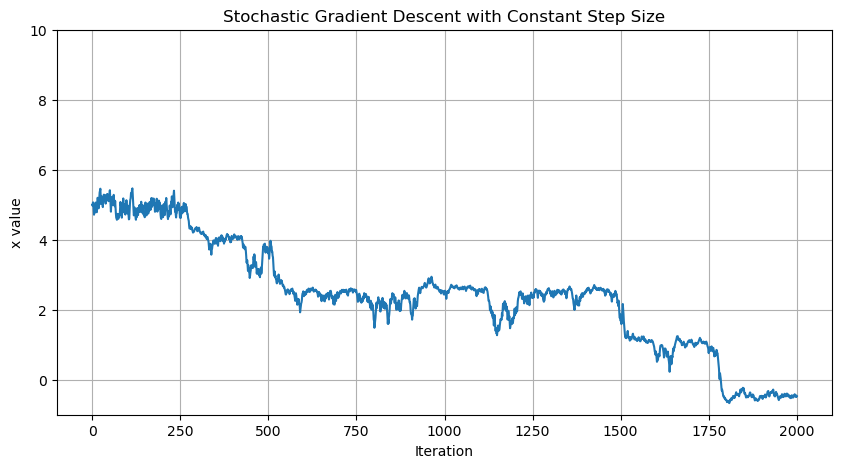

In [127]:
# Write your code here

import numpy as np
import matplotlib.pyplot as plt

# Constants
STEP_SIZE = 0.001
INITIAL_X = 5
NUM_ITERATIONS = 2000

def gradient_descent(initial_x):
    """
    Performs Gradient Descent optimization starting from initial_x.

    Parameters:
    initial_x (float): The starting point for the optimization.

    Returns:
    list: A list of x values at each iteration.
    """
    x = initial_x
    x_values = [x]
    for _ in range(NUM_ITERATIONS):
        x -= STEP_SIZE * derivative_f(x)
        x_values.append(x)
    return x_values

gd_x_values = gradient_descent(INITIAL_X)

plt.figure(figsize=(10, 5))
plt.plot(gd_x_values)
plt.title("Gradient Descent with Constant Step Size")
plt.xlabel("Iteration")
plt.ylabel("x value")
plt.ylim([-1, 10])
plt.grid(True)
plt.show()

def stochastic_gradient_descent(initial_x):
    """
    Performs Stochastic Gradient Descent optimization starting from initial_x.

    Parameters:
    initial_x (float): The starting point for the optimization.

    Returns:
    list: A list of x values at each iteration.
    """
    x = initial_x
    x_values = [x]
    for _ in range(NUM_ITERATIONS):
        index = np.random.randint(0, N)
        x -= STEP_SIZE * derivative_f_i_s[index](x)
        x_values.append(x)
    return x_values

sgd_x_values = stochastic_gradient_descent(INITIAL_X)

plt.figure(figsize=(10, 5))
plt.plot(sgd_x_values)
plt.title("Stochastic Gradient Descent with Constant Step Size")
plt.xlabel("Iteration")
plt.ylabel("x value")
plt.ylim([-1, 10])
plt.grid(True)
plt.show()
